<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Exploratory Data Analysis Global Terrorism Data</span>  </h1> 

In the previous phase, we meticulously cleaned, engineered features, and wrangled the raw Global Terrorism data, saving the refined dataset as "gtd_cleaned.csv."

Now, we embark on Exploratory Data Analysis (EDA) to delve into individual variables, study relationships between pairs, and unravel complex interactions among multiple variables. The goal is to extract valuable insights that illuminate patterns and guide informed conclusions about the data. Let's navigate this insightful journey through our refined data, seeking to uncover its hidden stories and unlock its potential for impactful analysis.

In [1]:
## Importing packages for analysis

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)   # display all columns without any truncation
pd.set_option('display.expand_frame_repr', False) # the DataFrame will not be displayed in a single line 
                                                    # and may span multiple lines for better readability.
    
pd.set_option('max_colwidth', None)  # the entire content of each column will be displayed without truncation

import matplotlib.pyplot as plt   # for visualisations
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # a filter to ignore all warnings generated in the code 

'''ensures that all plots generated 
using Matplotlib will be displayed within the notebook interface as static images '''

%matplotlib inline 

In [2]:
df = pd.read_csv('gtd_cleaned.csv')
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

Our data has 209706 rows and 45 columns.


Year  Month  Day Extended Incident?             Country                       Region Province / Administrative Region / State           City   Latitude   Longitude Vicinity POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) OUTSIDE INTERNATIONAL HUMANITARIAN LAW                      Doubt if Terrorism? Part of Multiple Incident Successful Attack Suicide Attack                     Attack Type           Target/Victim Type                                 Target/Victim Subtype               Name of Entity   Specific Target/Victim Nationality of Target/Victim              Perpetrator Group Name First Perpetrator Group Suspected/Unconfirmed?  Number of Perpetrators Captured Claim of Responsibility? Weapon Type         Weapon Sub-type  Total Number of Fatalities  Number of US Fatalities  Number of Perpetrator Fatalities  Total Number of Injured  Number of US Injured  Number of Perpetrators Injured Property Damage Hostages or Kidnapping Victims Data Collection International- Logistical International- Ideological International- Miscellaneous International- Any of the above Name of Month        Date
0  1970      7    2                 No  Dominican Republic  Central America & Caribbean                                 National  Santo Domingo  18.456792  -69.951164       No                                            Yes                                                                Yes                                    Yes                                       No                        No               Yes             No                   Assassination  Private Citizens & Property                                        Named Civilian                 Missing Info             Julio Guzman           Dominican Republic                              MANO-D                                             No                              -99                  Unknown     Unknown            Missing Info                           1                      -99                               -99                        0                   -99                             -99              No                             No            PGIS                        No                         No                           No                              No          July  1970-07-02
1  1970      5   15                 No              Mexico                North America                                  Federal    Mexico city  19.371887  -99.086624       No                                            Yes                                                                Yes                                    Yes                                       No                        No               Yes             No     Hostage Taking (Kidnapping)      Government (Diplomatic)  Diplomatic Personnel (outside of embassy, consulate)  Belgian Ambassador Daughter  Nadine Chaval, daughter                      Belgium  23rd of September Communist League                                             No                              -99                  Unknown     Unknown            Missing Info                           0                      -99                               -99                        0                   -99                             -99              No                            Yes            PGIS                        No                        Yes                          Yes                             Yes           May  1970-05-15
2  1970      1   26                 No         Philippines               Southeast Asia                                   Tarlac        Unknown  15.478598  120.599741       No                                            Yes                                                                Yes                                    Yes                                       No                        No               Yes             No                   Assassination          Journalists & 

In [3]:
num_cols = list(df.select_dtypes('int64').columns)  # Selecting numerical columns
cat_cols = list(df.select_dtypes('object').columns)  # Selecting categorical columns

In [4]:
print(num_cols)

['Year', 'Month', 'Day', 'Number of Perpetrators Captured', 'Total Number of Fatalities', 'Number of US Fatalities', 'Number of Perpetrator Fatalities', 'Total Number of Injured', 'Number of US Injured', 'Number of Perpetrators Injured']


- As we know the description of each numerical column

<AxesSubplot: >

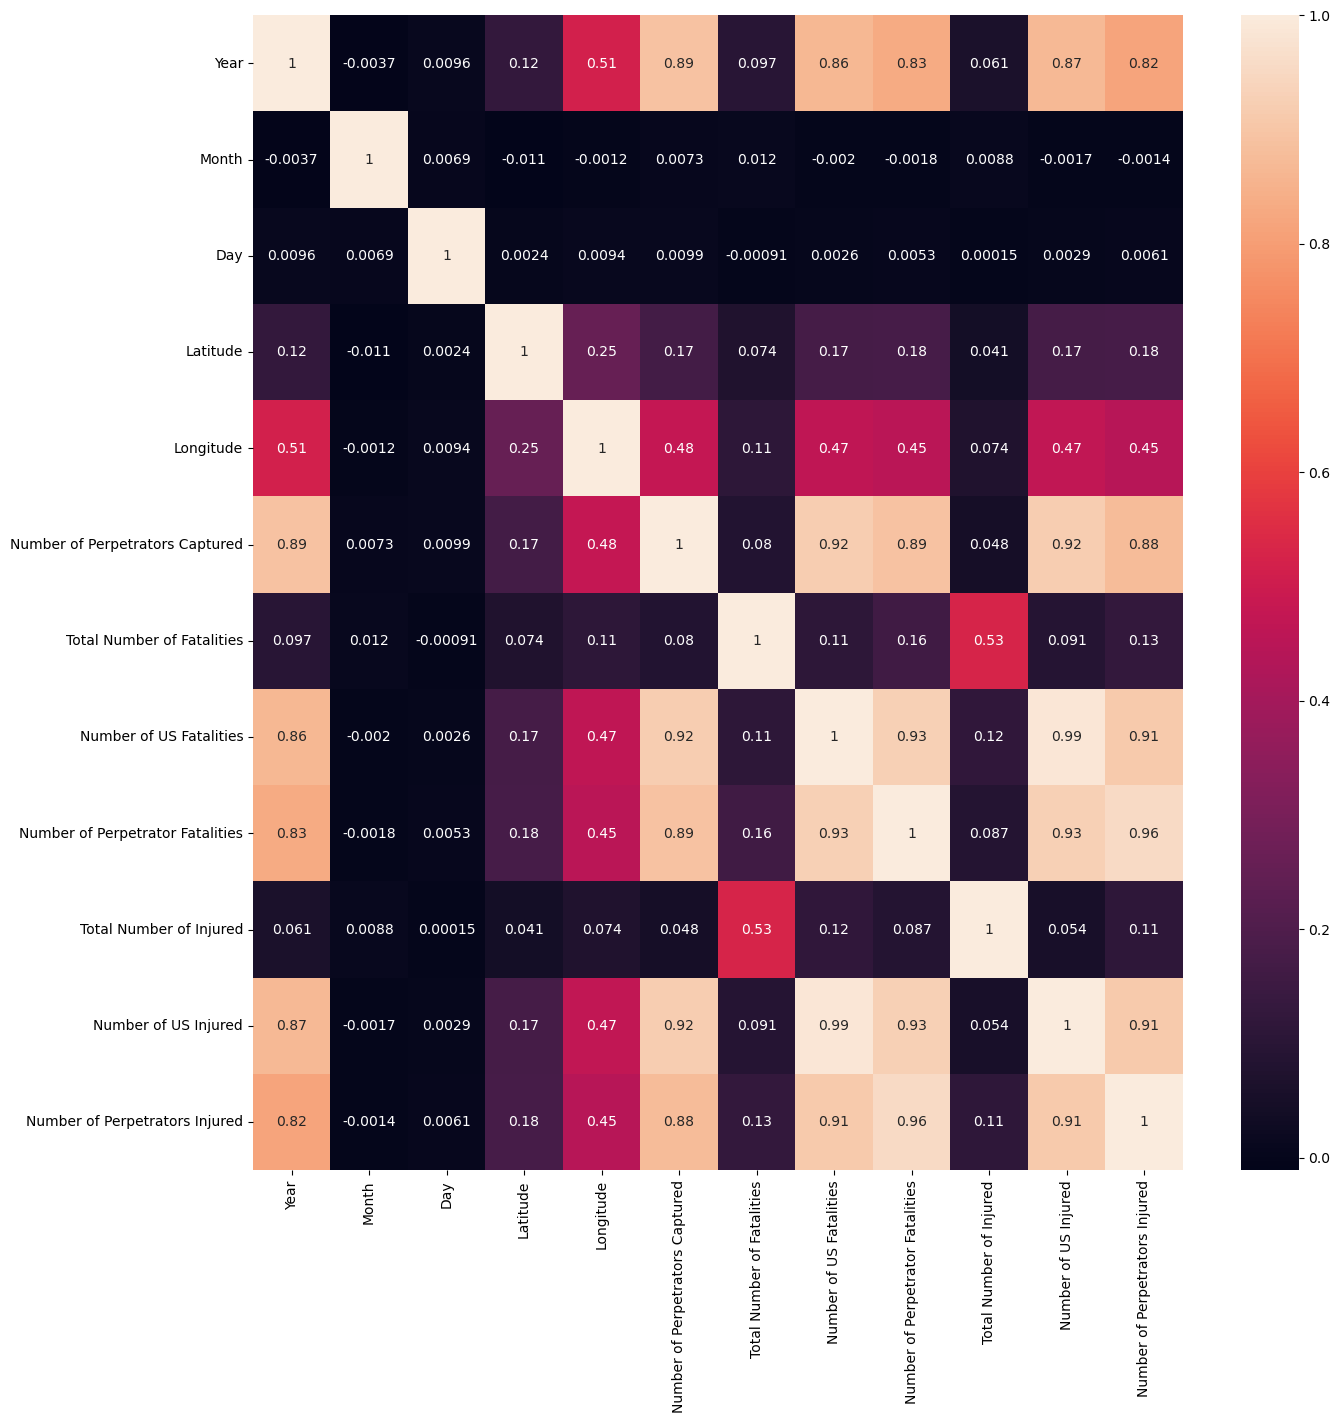

In [5]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot=True)

- It can be observed that **several numeric columns have high correlation with other numeric columns**.
- But we remember that all the **missing values** in numeric columns were **imputed with single value, i.e., "-99"**, which may have artificially **lead to high degree of correlation** between these columns.
- Thus, **using correlation** as a method to understand the relationship **between these columns is not reliable**.
- For our further analysis, we would exclude the rows with missing values and then use a desired method to understand the relationships better.

- Let us have a look at number of attacks over the years to understand the relationship between them better.

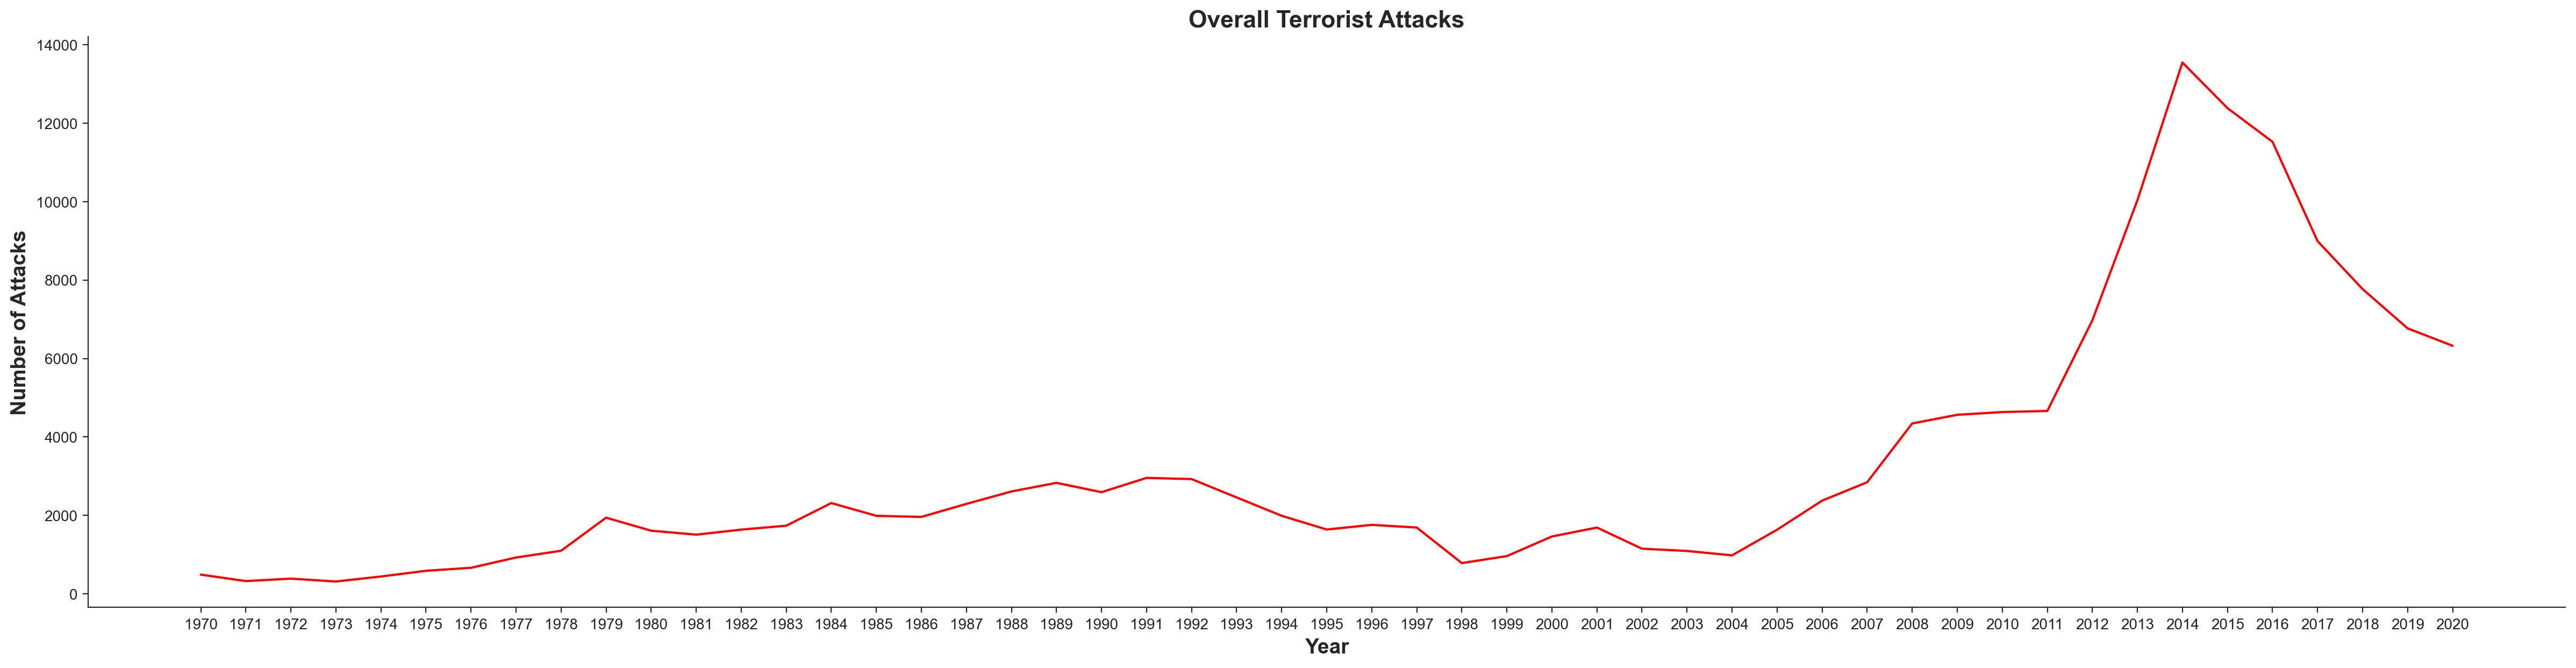

In [6]:
''' Taking only attacks which are terrorism attacks for sure'''
# Setting the size and DPI
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
sns.set_style('ticks')
year_attack_count = df[df['Doubt if Terrorism?'] == 'No'].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_attack_count.values, kind='line', data=year_attack_count, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Attacks', fontweight='bold', fontsize=14)
plt.title('Overall Terrorist Attacks',fontsize=16, fontweight='bold')
plt.show()

- `Number of terrorist attack` increased gradually till 2014, where there were maximum terrorist attacks and after 2014, number of attacks started to decrease.

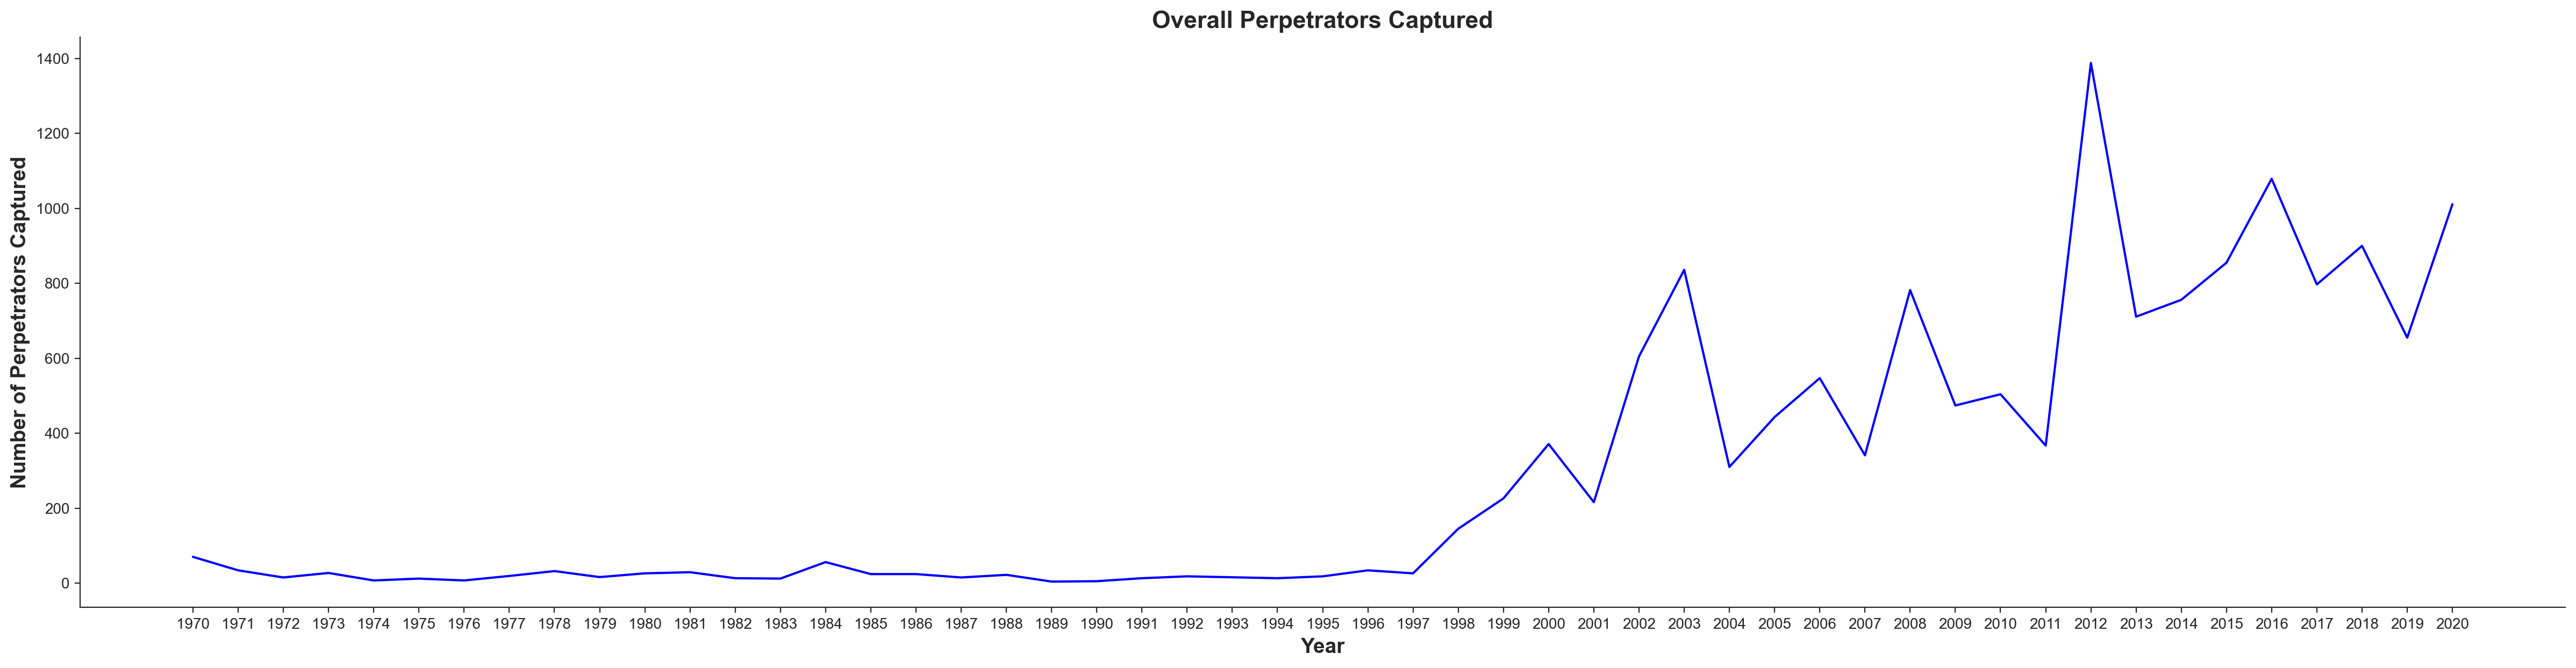

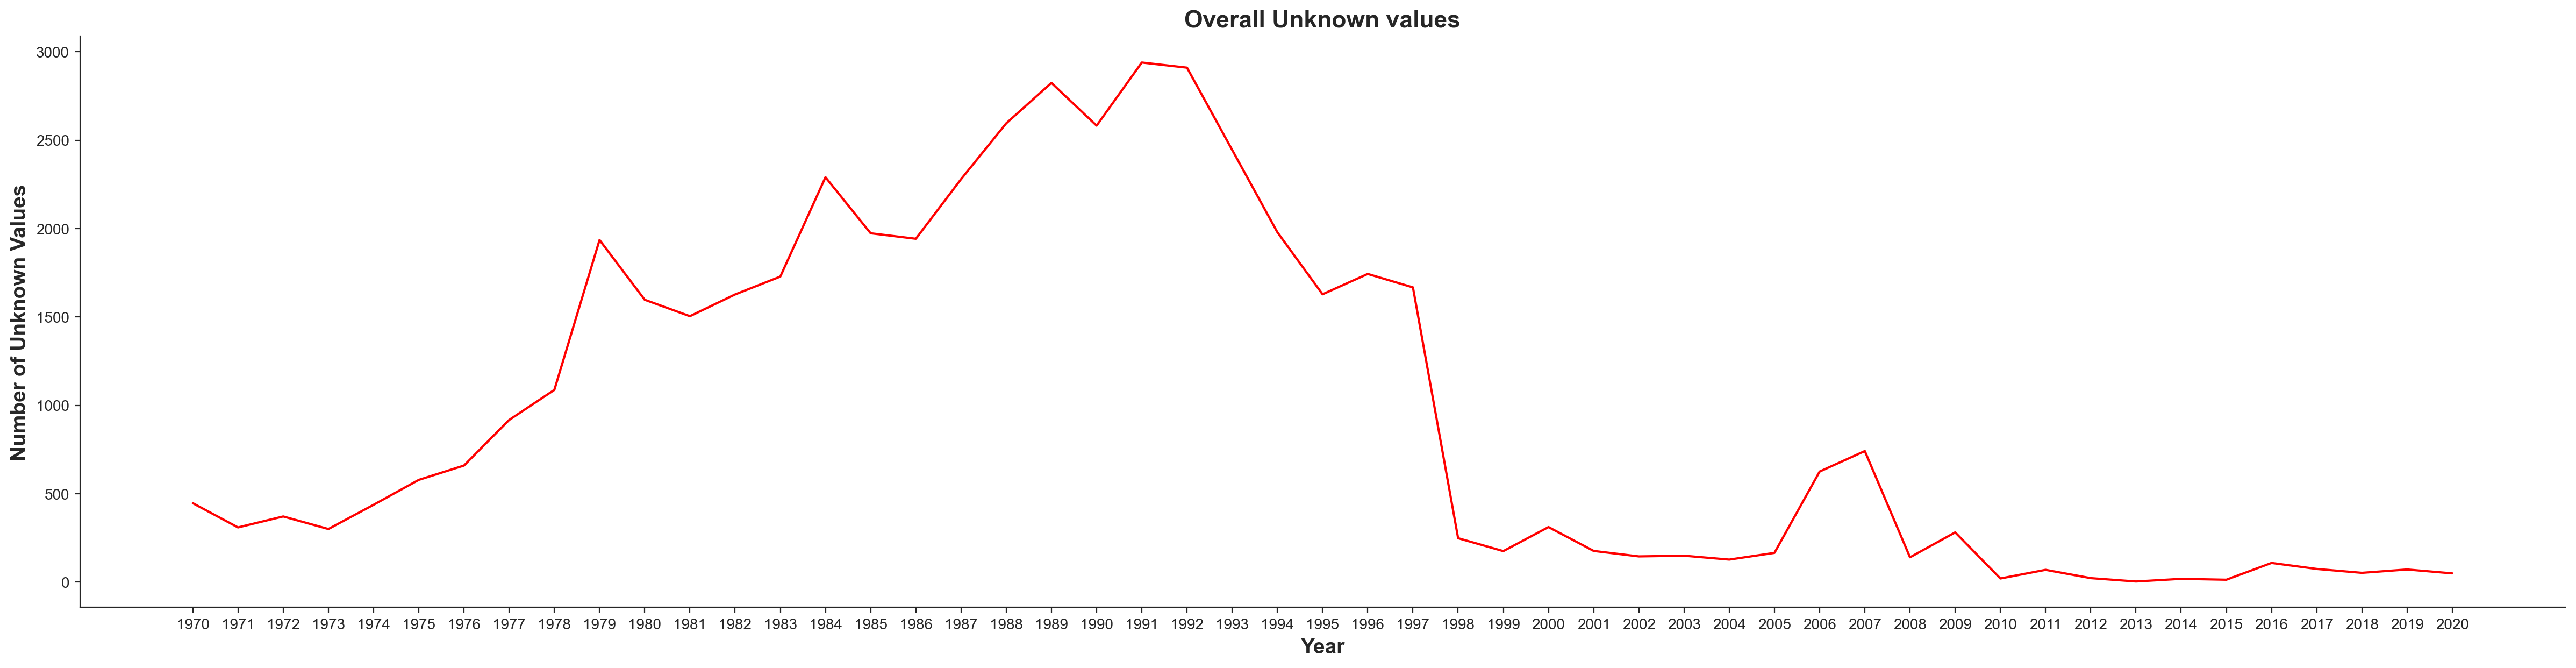

In [7]:
## Discarding Missing values in "Number of Perpetrators Captured" column

year_num_per_cap = df[(df['Number of Perpetrators Captured'] != -99) & (df['Doubt if Terrorism?'] == 'No')]\
.groupby('Year')['Number of Perpetrators Captured'].sum()  ## Summing number of perpetrators captured for each year

sns.relplot(x='Year', y=year_num_per_cap.values, kind='line', data=year_num_per_cap, height = 6, aspect=4, color='blue')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Perpetrators Captured', fontweight='bold', fontsize=14)
plt.title('Overall Perpetrators Captured',fontsize=16, fontweight='bold')
plt.show()

## Looking at missing value years

year_num_per_cap_missing = df[(df['Number of Perpetrators Captured'] == -99) & (df['Doubt if Terrorism?'] == 'No')].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_num_per_cap_missing.values, kind='line', data=year_num_per_cap_missing, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Unknown Values', fontweight='bold', fontsize=14)
plt.title('Overall Unknown values',fontsize=16, fontweight='bold')
plt.show()

- In the first plot, `Number of perpetrators captured has increased over the year maximising at 2012 and fluctuating after that`.
- In the first plot, it can be observed that there were **no perpetrators captured till 1997**, which is strange because there were attacks between **0-4000** till 1998.
- To understand better, we made a lineplot to look at all unknown values in "Number of Perpetrators Captured" column and observed that **number of unknown values increases and lies between a range of 700-5000 till the year 1998** which indicates that `number of perpetrators captured might not have been recorded for these years leading to "missing" or "unknown" values`.

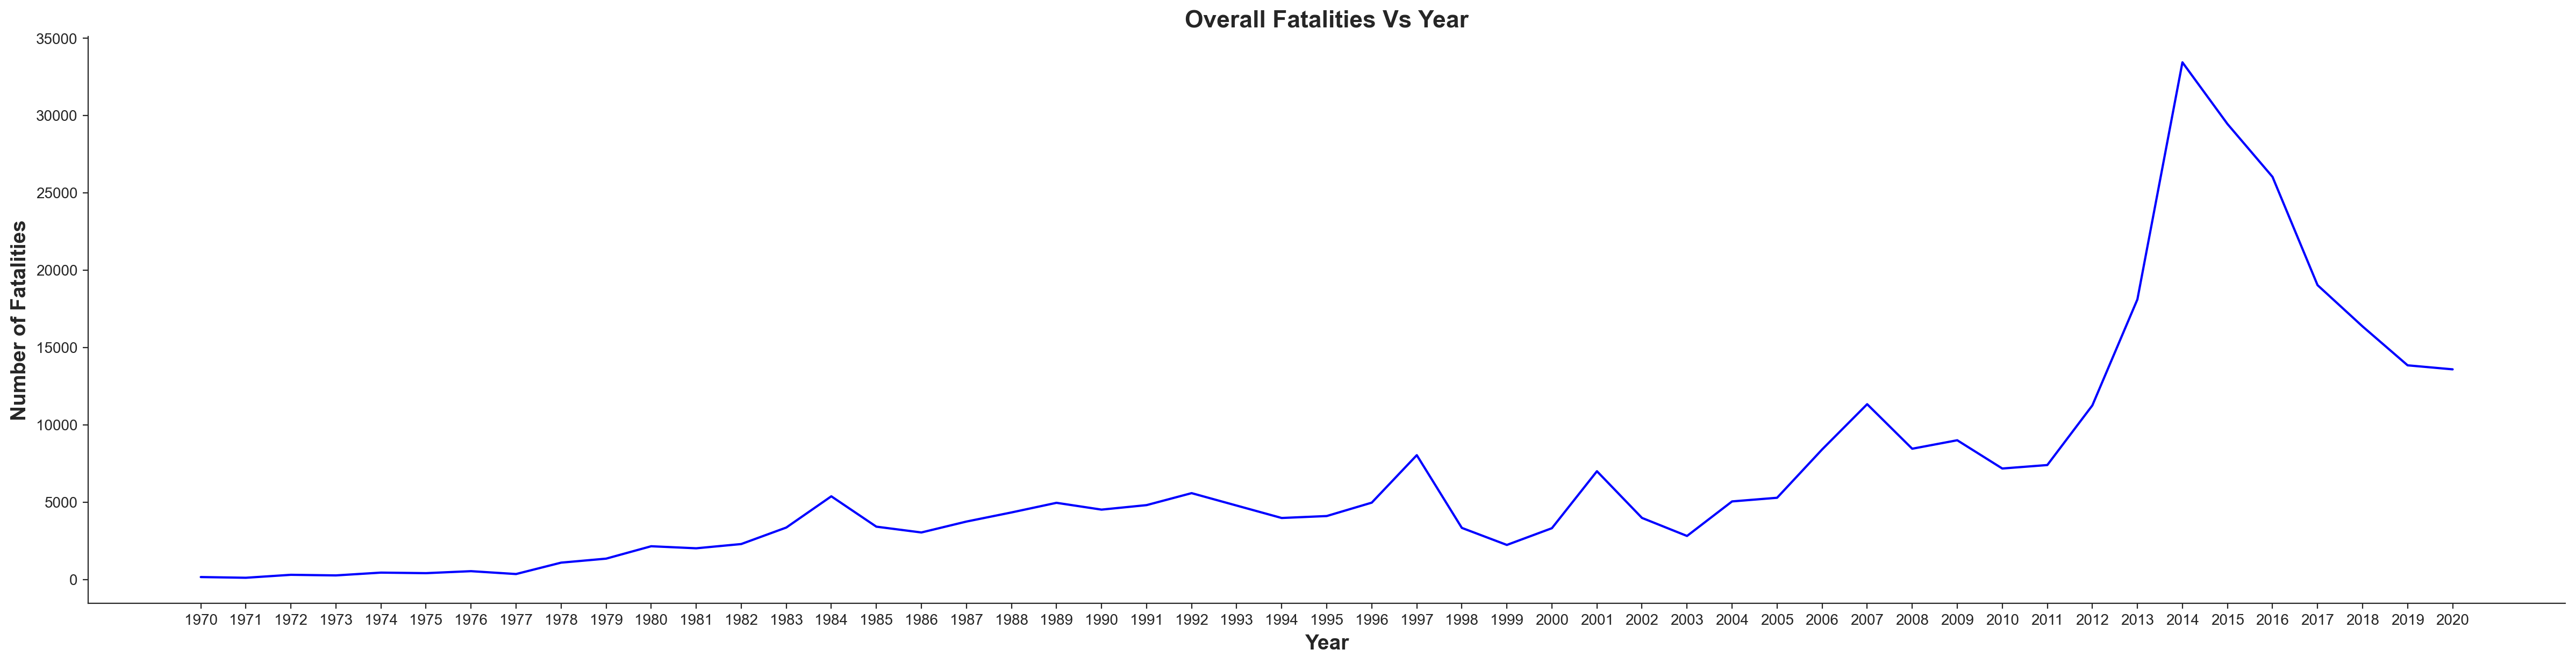

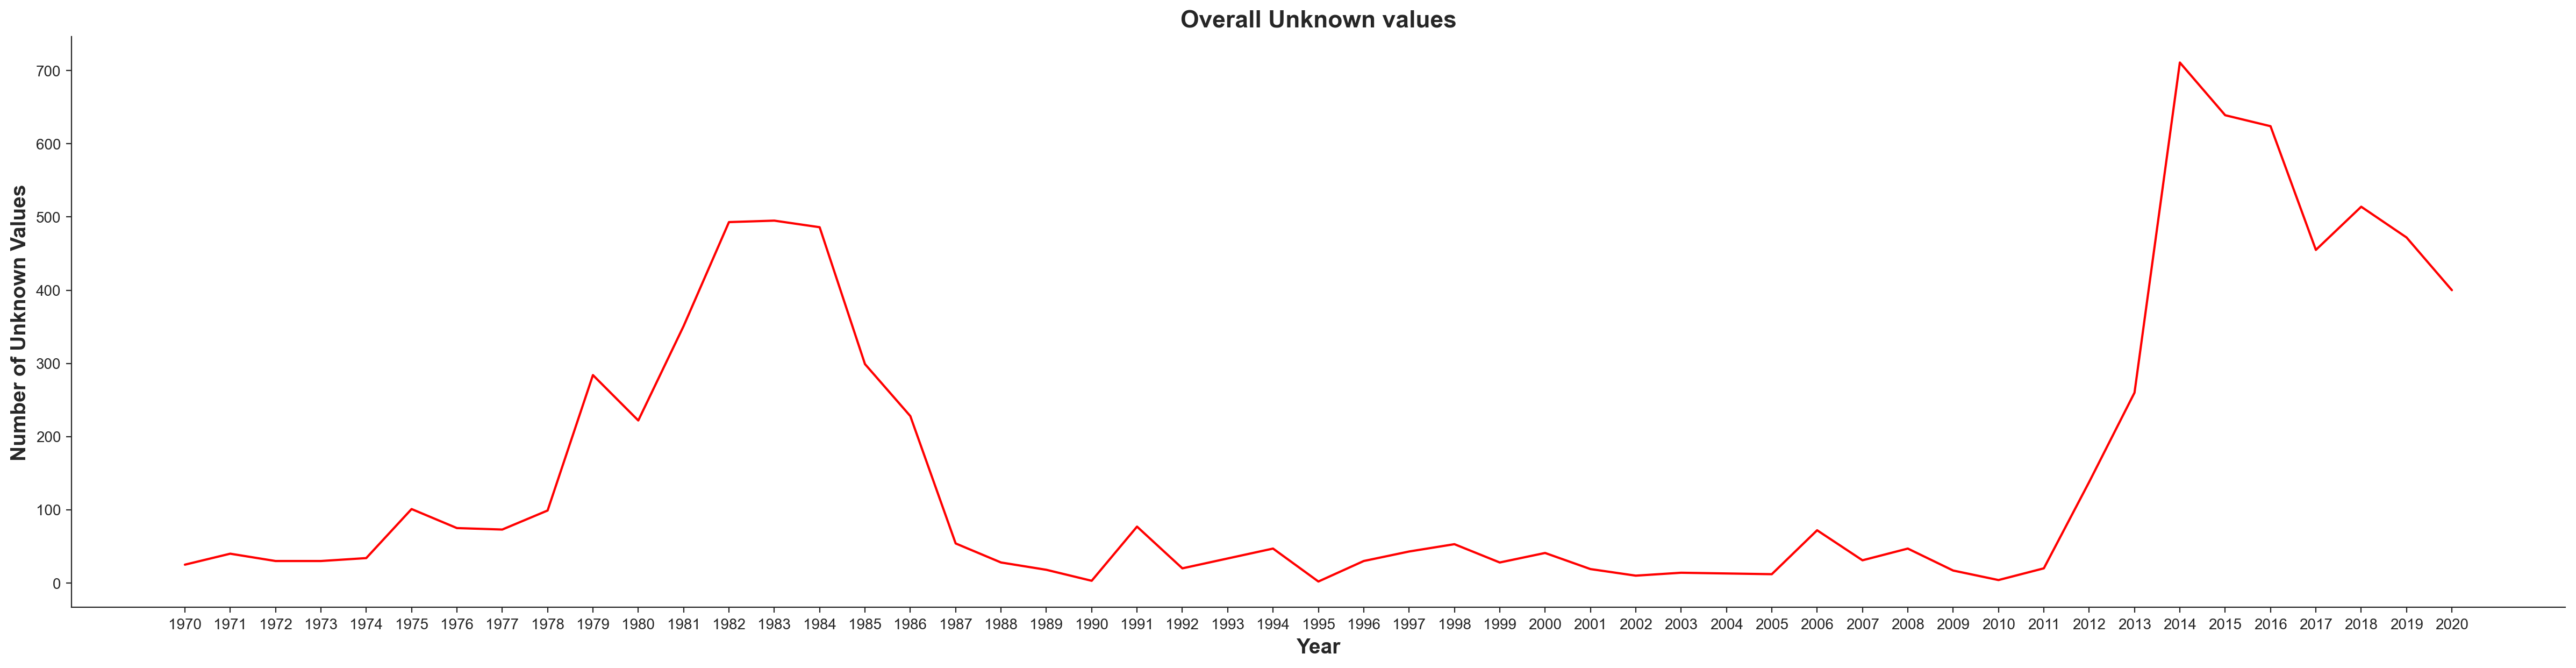

In [8]:
## Discarding Missing values in "Total Number of Fatalities" column

year_num_per_cap = df[(df['Total Number of Fatalities'] != -99) & (df['Doubt if Terrorism?'] == 'No')].\
groupby('Year')['Total Number of Fatalities'].sum()  ## Summing the total number of fatalities for each year

sns.relplot(x='Year', y=year_num_per_cap.values, kind='line', data=year_num_per_cap, height = 6, aspect=4, color='blue')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Fatalities', fontweight='bold', fontsize=14)
plt.title('Overall Fatalities Vs Year',fontsize=16, fontweight='bold')
plt.show()

## Looking at missing value years

year_num_per_cap_missing = df[(df['Total Number of Fatalities'] == -99) & (df['Doubt if Terrorism?'] == 'No')].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_num_per_cap_missing.values, kind='line', data=year_num_per_cap_missing, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Unknown Values', fontweight='bold', fontsize=14)
plt.title('Overall Unknown values',fontsize=16, fontweight='bold')
plt.show()

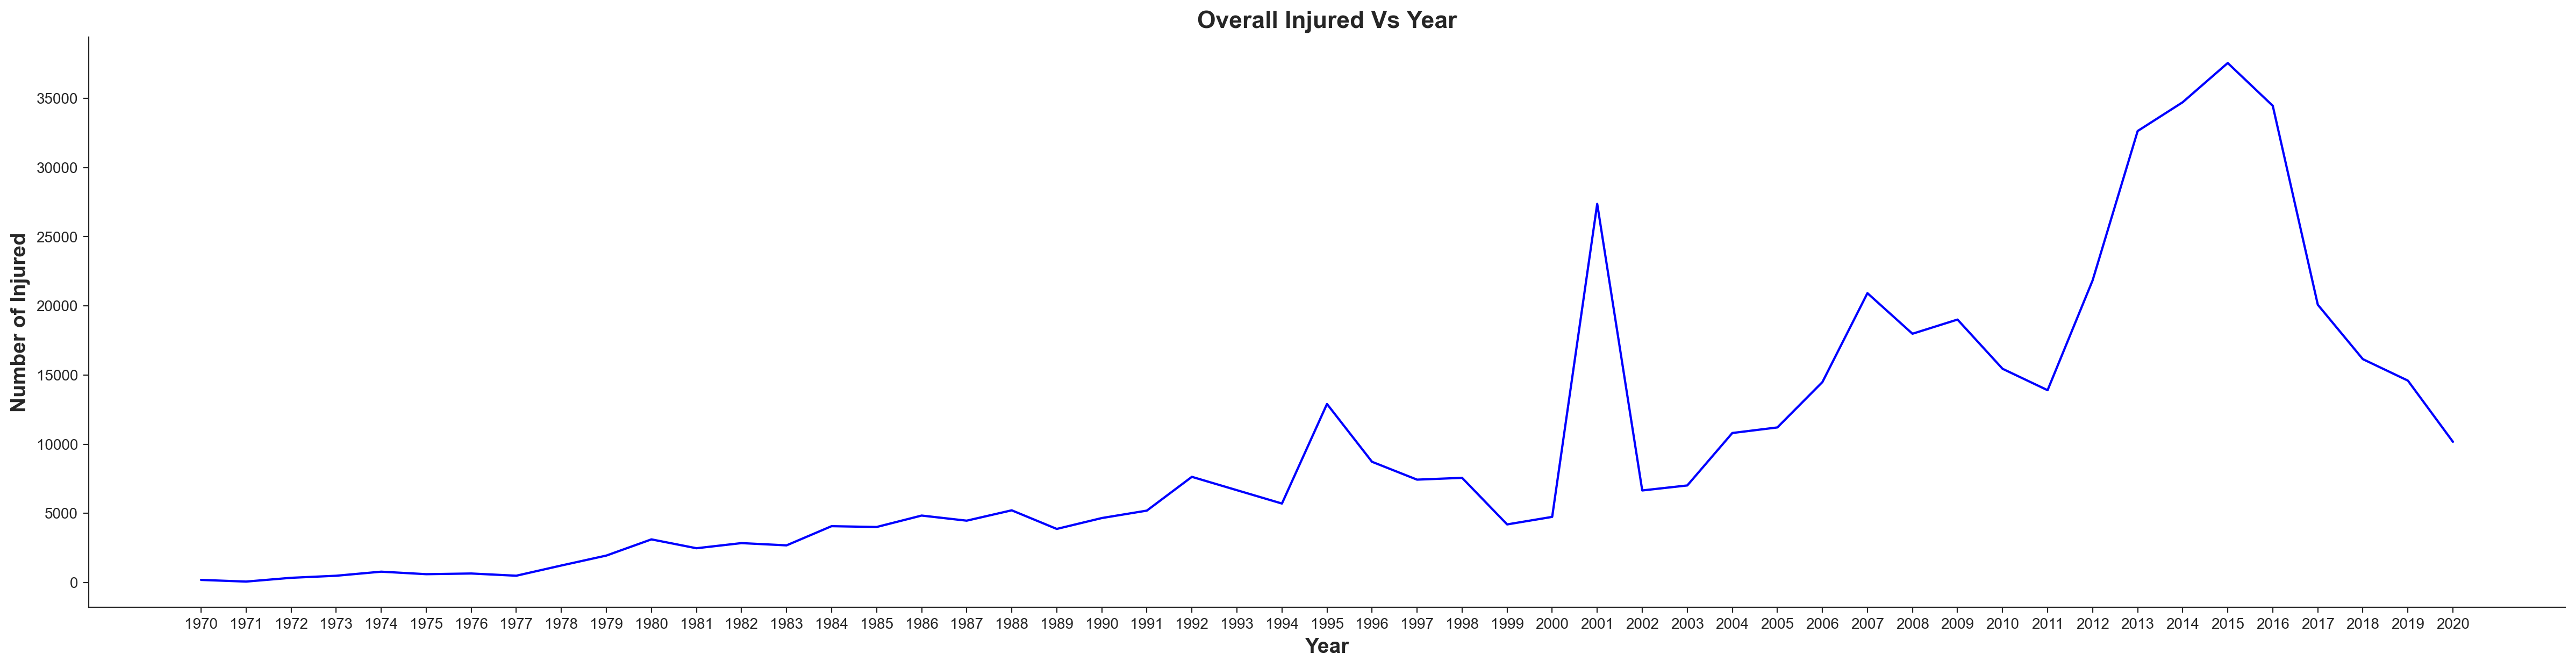

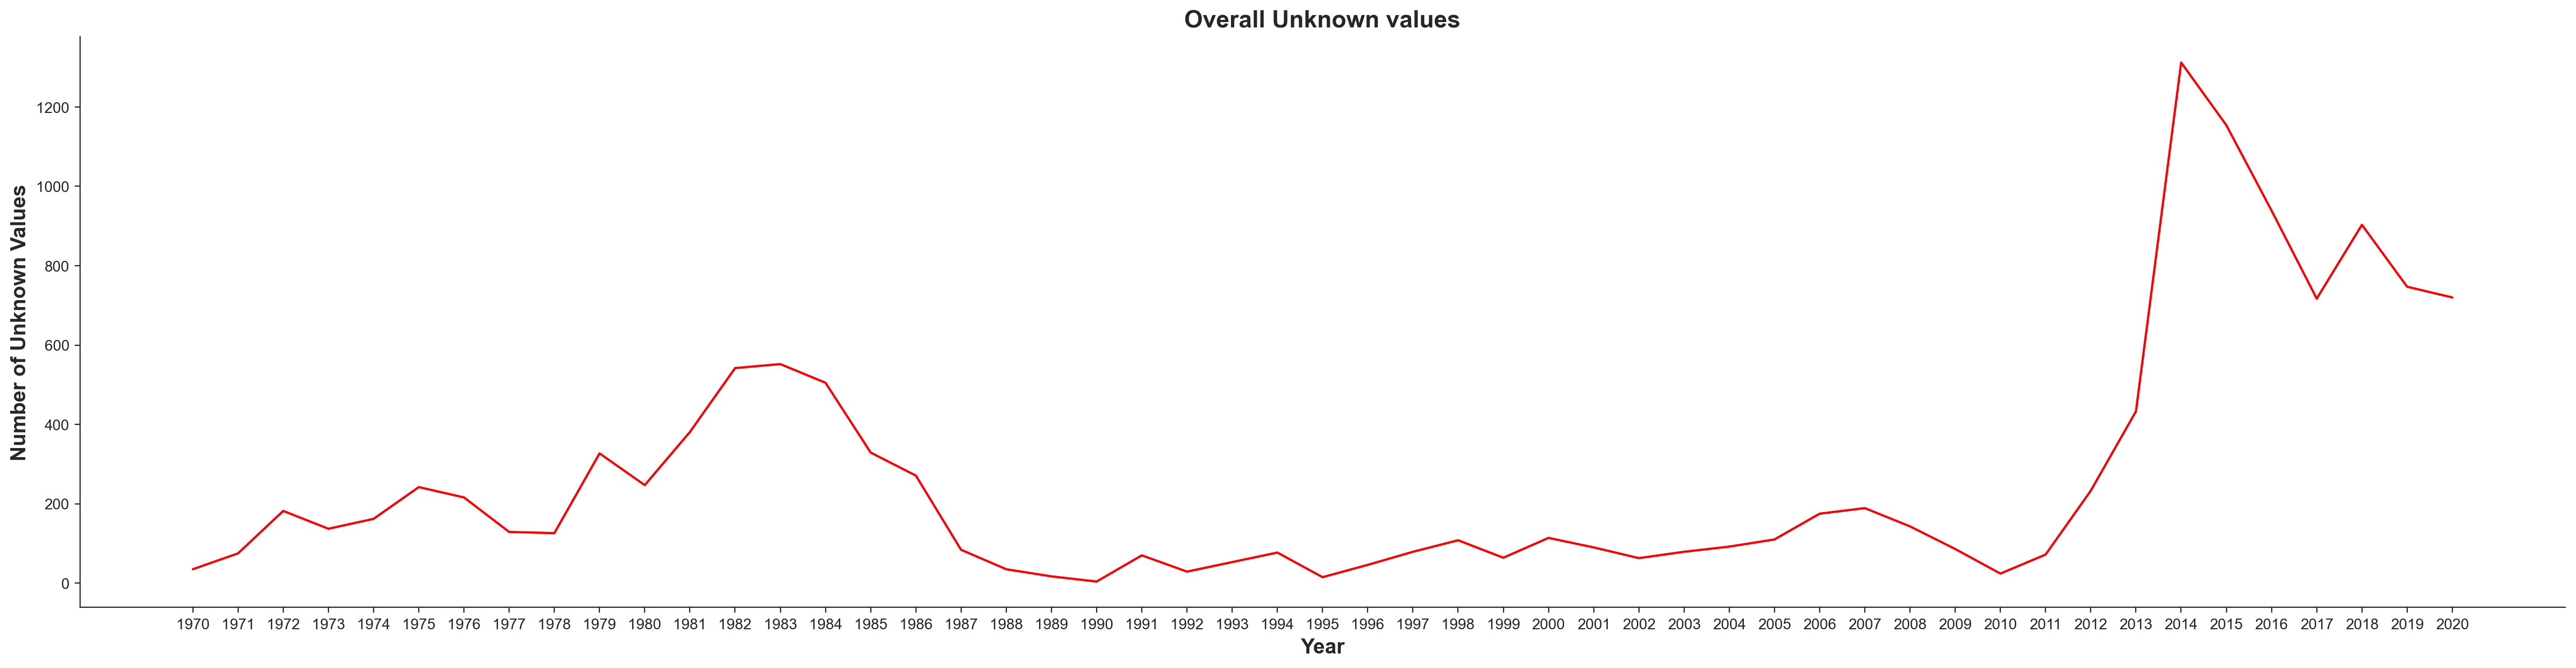

In [9]:
## Discarding Missing values in "Total Number of Injured" column

year_num_per_cap = df[(df['Total Number of Injured'] != -99) & (df['Doubt if Terrorism?'] == 'No')].\
groupby('Year')['Total Number of Injured'].sum()  ## Summing the total number of fatalities for each year

sns.relplot(x='Year', y=year_num_per_cap.values, kind='line', data=year_num_per_cap, height = 6, aspect=4, color='blue')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Injured', fontweight='bold', fontsize=14)
plt.title('Overall Injured Vs Year',fontsize=16, fontweight='bold')
plt.show()

## Looking at missing value years

year_num_per_cap_missing = df[(df['Total Number of Injured'] == -99) & (df['Doubt if Terrorism?'] == 'No')].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_num_per_cap_missing.values, kind='line', data=year_num_per_cap_missing, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Unknown Values', fontweight='bold', fontsize=14)
plt.title('Overall Unknown values',fontsize=16, fontweight='bold')
plt.show()

- Overall three numerical columns, `"Number of Perpetrators Captured", "Total Number of Fatalities" and "Total Number of Injured" seem to be highest for year 2014`. We will dive deeper into the year 2014 attacks and look closer.

In [10]:
cols = list(df.columns)    ## We need to take care for for -99 (missing value) when working with these columns

for i in cols:
    if -99 in df[i].values:
        print(f'{i} : Yes')

Number of Perpetrators Captured : Yes
Total Number of Fatalities : Yes
Number of US Fatalities : Yes
Number of Perpetrator Fatalities : Yes
Total Number of Injured : Yes
Number of US Injured : Yes
Number of Perpetrators Injured : Yes


In [11]:
print(list(cat_cols))

['Extended Incident?', 'Country', 'Region', 'Province / Administrative Region / State', 'City', 'Vicinity', 'POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL', 'INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)', 'OUTSIDE INTERNATIONAL HUMANITARIAN LAW', 'Doubt if Terrorism?', 'Part of Multiple Incident', 'Successful Attack', 'Suicide Attack', 'Attack Type', 'Target/Victim Type', 'Target/Victim Subtype', 'Name of Entity', 'Specific Target/Victim', 'Nationality of Target/Victim', 'Perpetrator Group Name', 'First Perpetrator Group Suspected/Unconfirmed?', 'Claim of Responsibility?', 'Weapon Type', 'Weapon Sub-type', 'Property Damage', 'Hostages or Kidnapping Victims', 'Data Collection', 'International- Logistical', 'International- Ideological', 'International- Miscellaneous', 'International- Any of the above', 'Name of Month', 'Date']


- Now, let us look into categorical columns, to understand the attacks better.


## Univariate Analysis of Categorical Variables

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_variable_with_percentage(data, x_variable, top_n=None, min_categories_for_bigger_plot=5, figsize=None):
    # Count the unique values and their counts
    value_counts = data[x_variable].value_counts().reset_index()
    value_counts.columns = [x_variable, 'count']
    
    # Sort the values in descending order
    value_counts = value_counts.sort_values(by='count', ascending=False)

    # Select the top N categories
    if top_n is not None:
        value_counts = value_counts.head(top_n)

    # Calculate the size based on the number of categories
    num_categories = len(value_counts)
    
    if num_categories < min_categories_for_bigger_plot:
        plot_size = (8, 6)  # Default size for smaller categories
    else:
        plot_size = (10, num_categories * 0.5)  # Default size for larger categories

    if figsize is not None:
        # If figsize is provided, use it to set the figure size
        plt.figure(figsize=figsize)
    else:
        # Use the default plot size if figsize is not provided
        figsize = plot_size

    # Create a count plot with the selected order and adjusted size
    plot = sns.catplot(x=x_variable, data=data, kind='count', order=value_counts[x_variable], height=plot_size[1])

    # Rotate x-axis titles by 90 degrees
    plt.xticks(rotation=90)

    # Calculate the total count
    total = len(data)

    # Annotate the percentage above each bar
    ax = plot.facet_axis(0, 0)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

    # Show the plot
    plt.show()

# Example usage to display the top 5 categories with adjusted plot size:
# plot_categorical_variable_with_percentage(df, 'Extended Incident?', top_n=5)


In [13]:
print(list(cat_cols))

['Extended Incident?', 'Country', 'Region', 'Province / Administrative Region / State', 'City', 'Vicinity', 'POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL', 'INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S)', 'OUTSIDE INTERNATIONAL HUMANITARIAN LAW', 'Doubt if Terrorism?', 'Part of Multiple Incident', 'Successful Attack', 'Suicide Attack', 'Attack Type', 'Target/Victim Type', 'Target/Victim Subtype', 'Name of Entity', 'Specific Target/Victim', 'Nationality of Target/Victim', 'Perpetrator Group Name', 'First Perpetrator Group Suspected/Unconfirmed?', 'Claim of Responsibility?', 'Weapon Type', 'Weapon Sub-type', 'Property Damage', 'Hostages or Kidnapping Victims', 'Data Collection', 'International- Logistical', 'International- Ideological', 'International- Miscellaneous', 'International- Any of the above', 'Name of Month', 'Date']


- Let us look into each Categorical variable and understand them better individually.

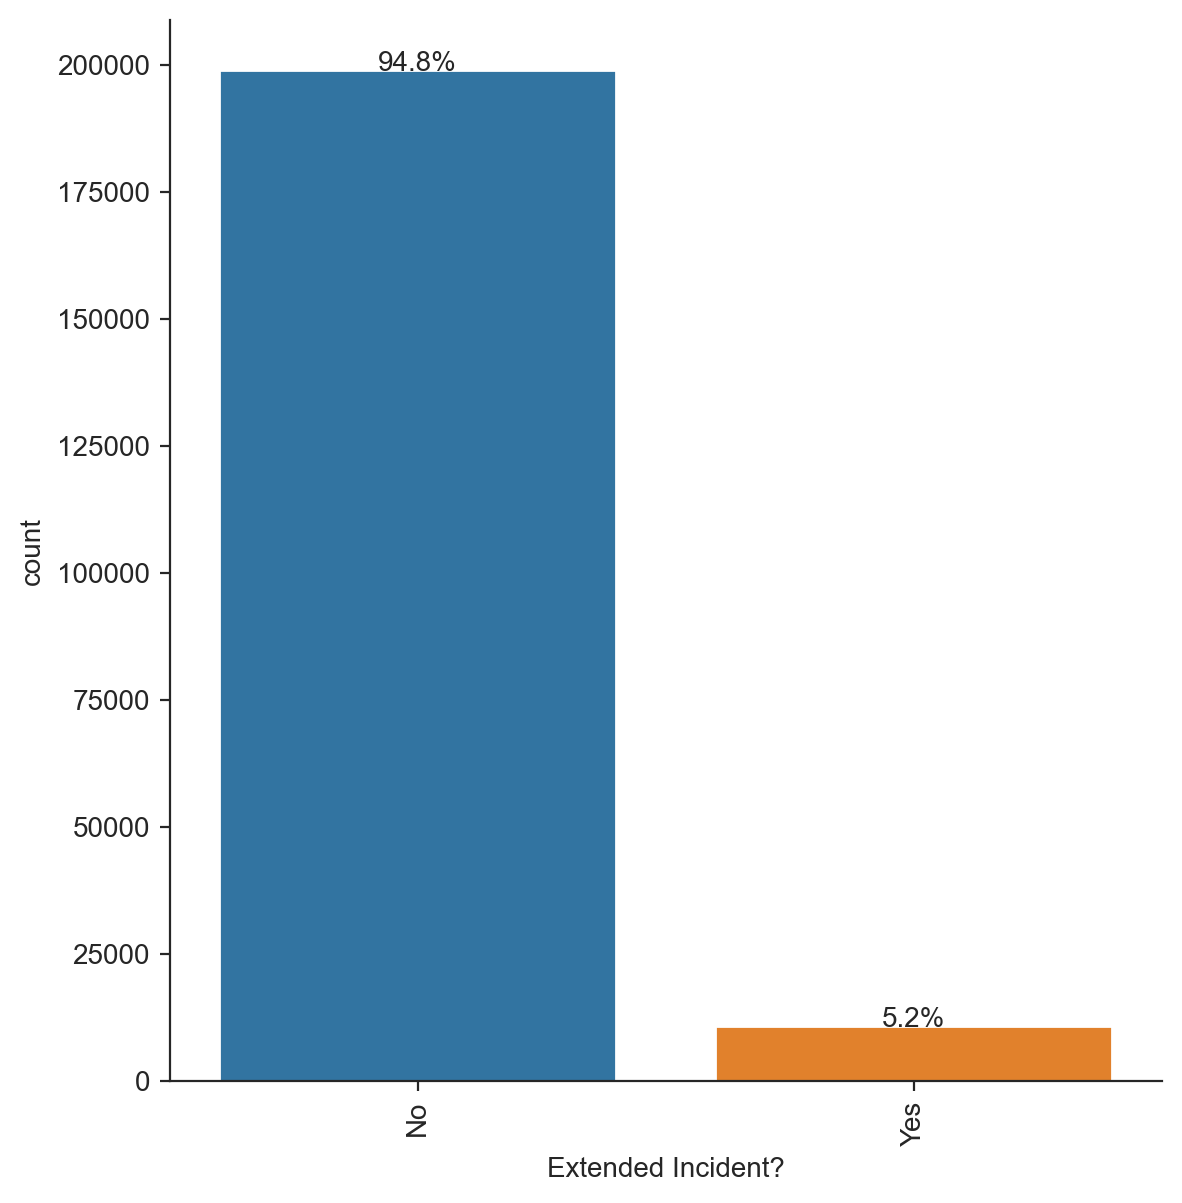

In [14]:
plot_categorical_variable_with_percentage(df, cat_cols[0])

- Around `95%` of the attacks are not `Extended Incident`s, which means they did not exceed a duration of 24 hours.
- <span style="color: red;"> We can look deeper into attacks which extended beyond 24 hours.</span>


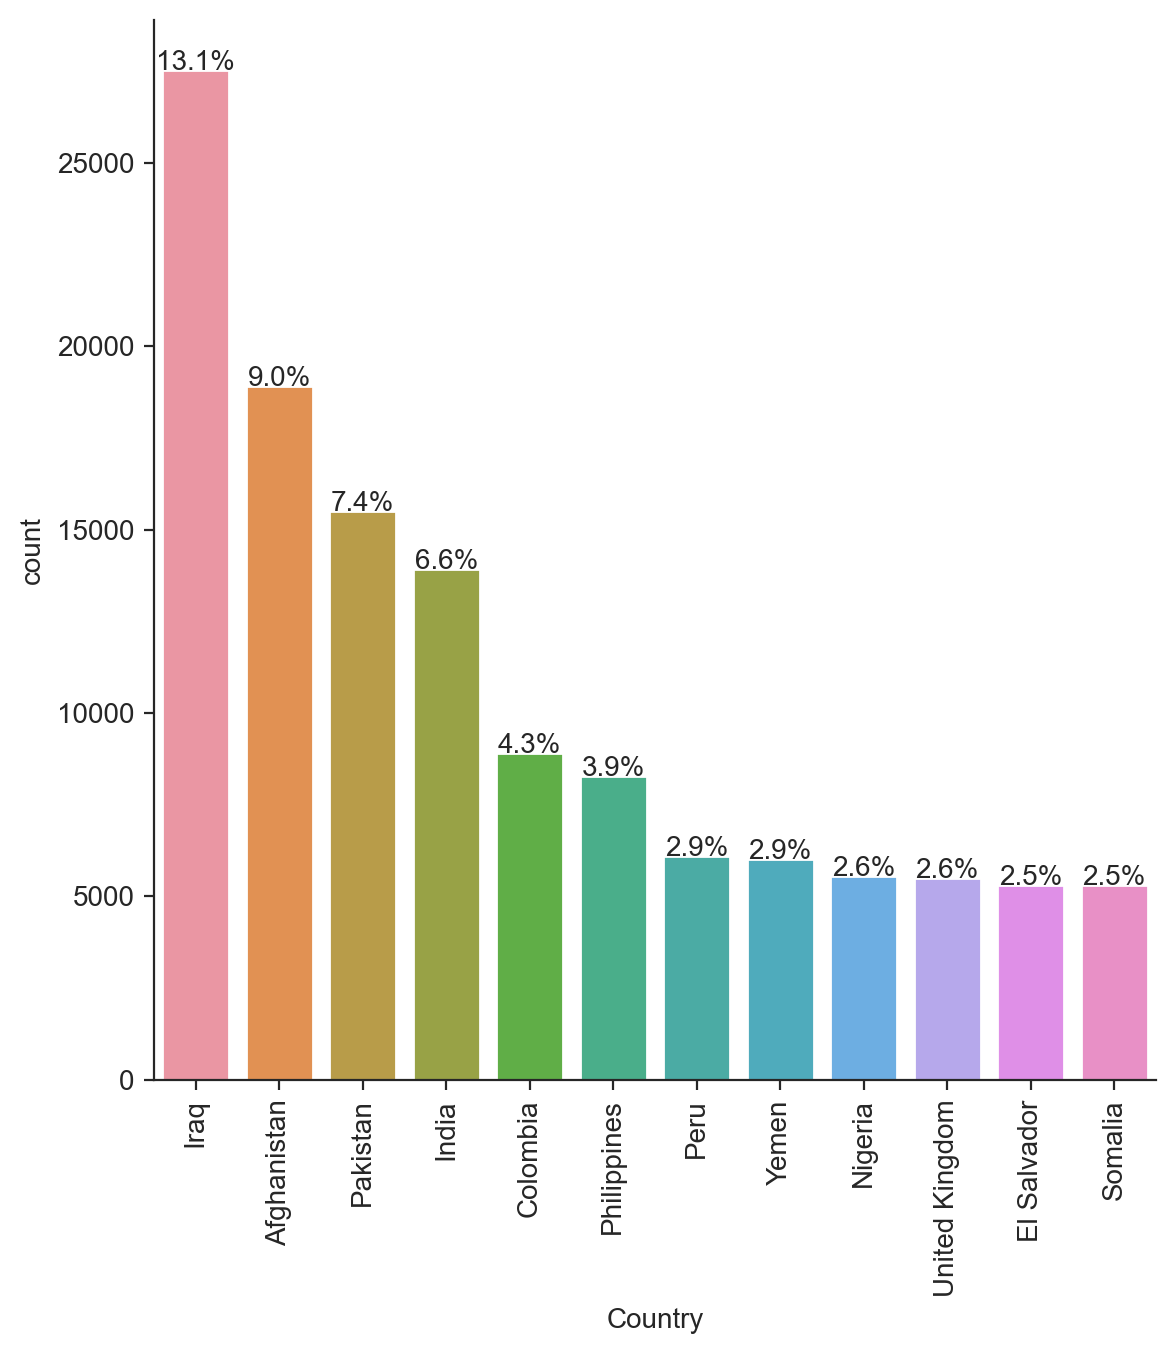

In [15]:
plot_categorical_variable_with_percentage(df, cat_cols[1], top_n=12)

- Around `13%` (majority) of the attacks have been in `Iraq` followed by `Afghanistan` (`9%`),`Pakistan` (`7.4%`) and `India` (`6.6%`).

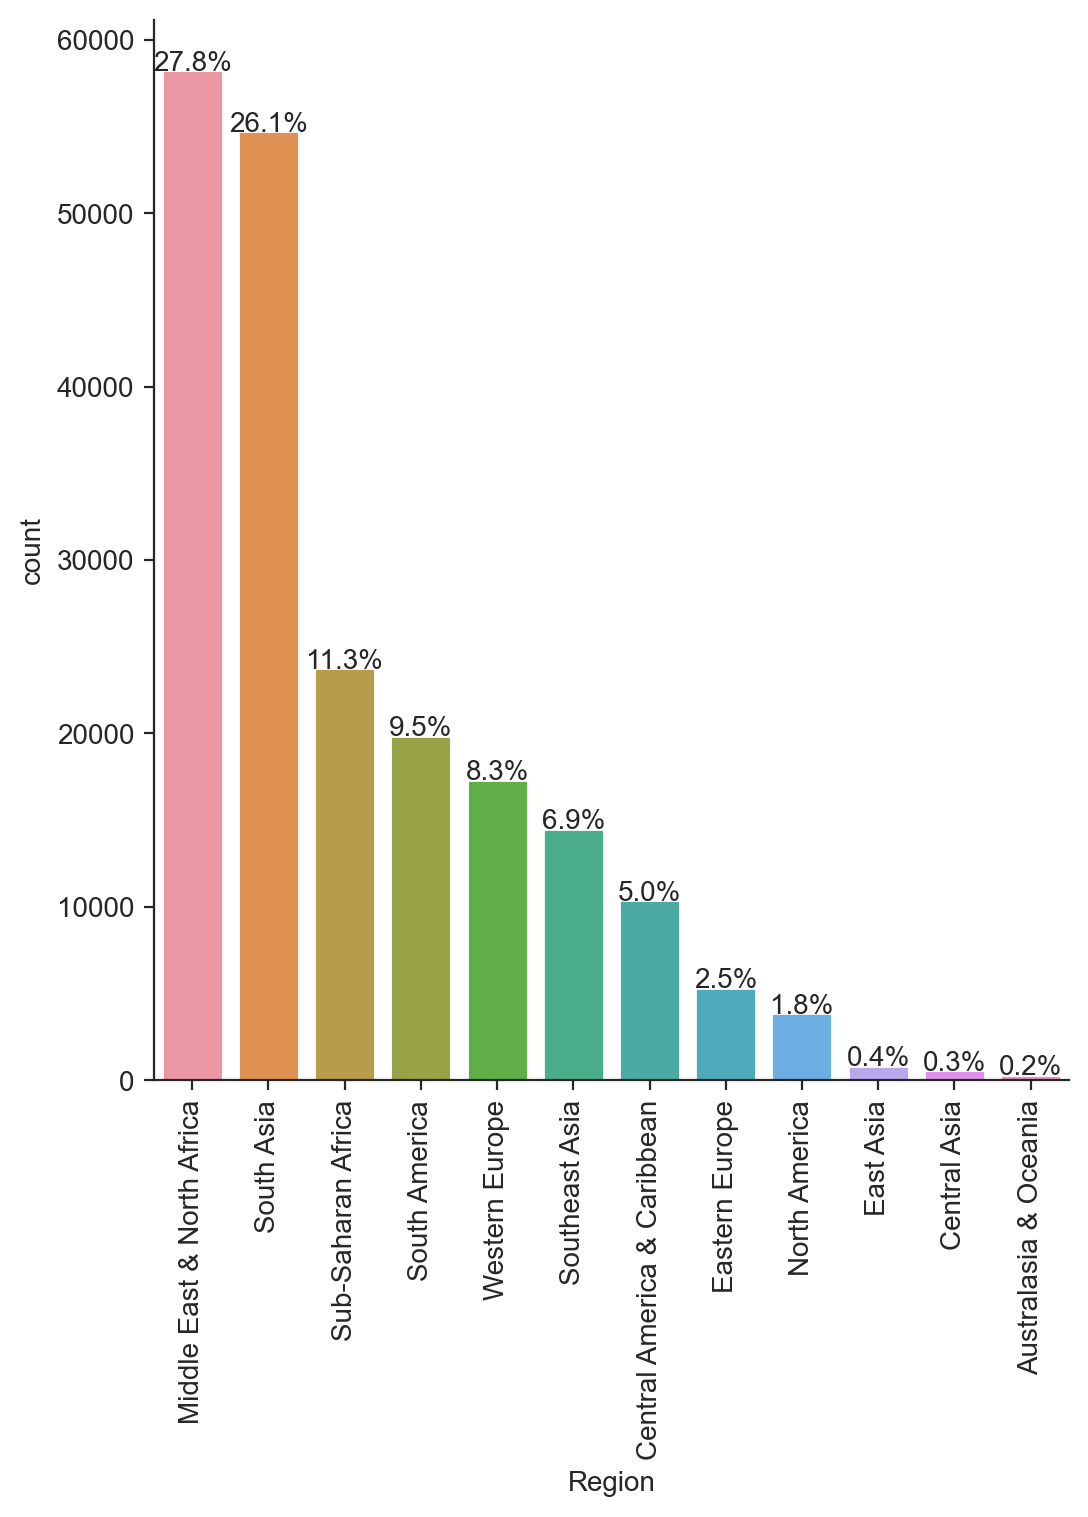

In [16]:
plot_categorical_variable_with_percentage(df, cat_cols[2], 12)

- Around `28%` (majority) of the attacks have been in `Middle East & North Africa` followed by `South Asia` (`26%%`),`Sub-Saharan Africa` (`11.3%`) and `South America` (`9.5%%`).

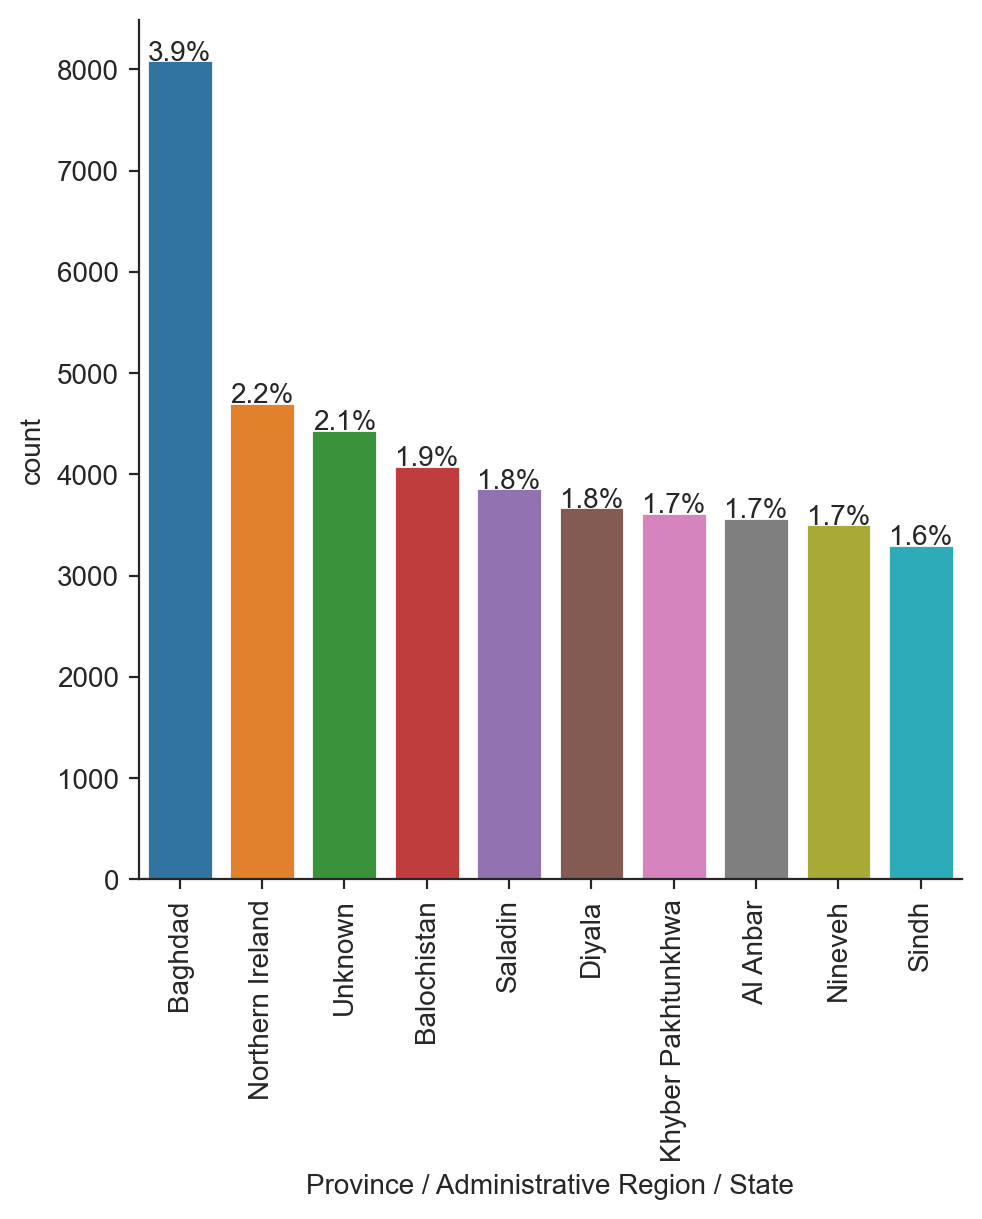

In [17]:
plot_categorical_variable_with_percentage(df, cat_cols[3], top_n=10)

- There is no such pattern in `Province / Administrative Region / State` as the distribution is very uniform, no pattern can be observed
- Similar is true for `City` column.

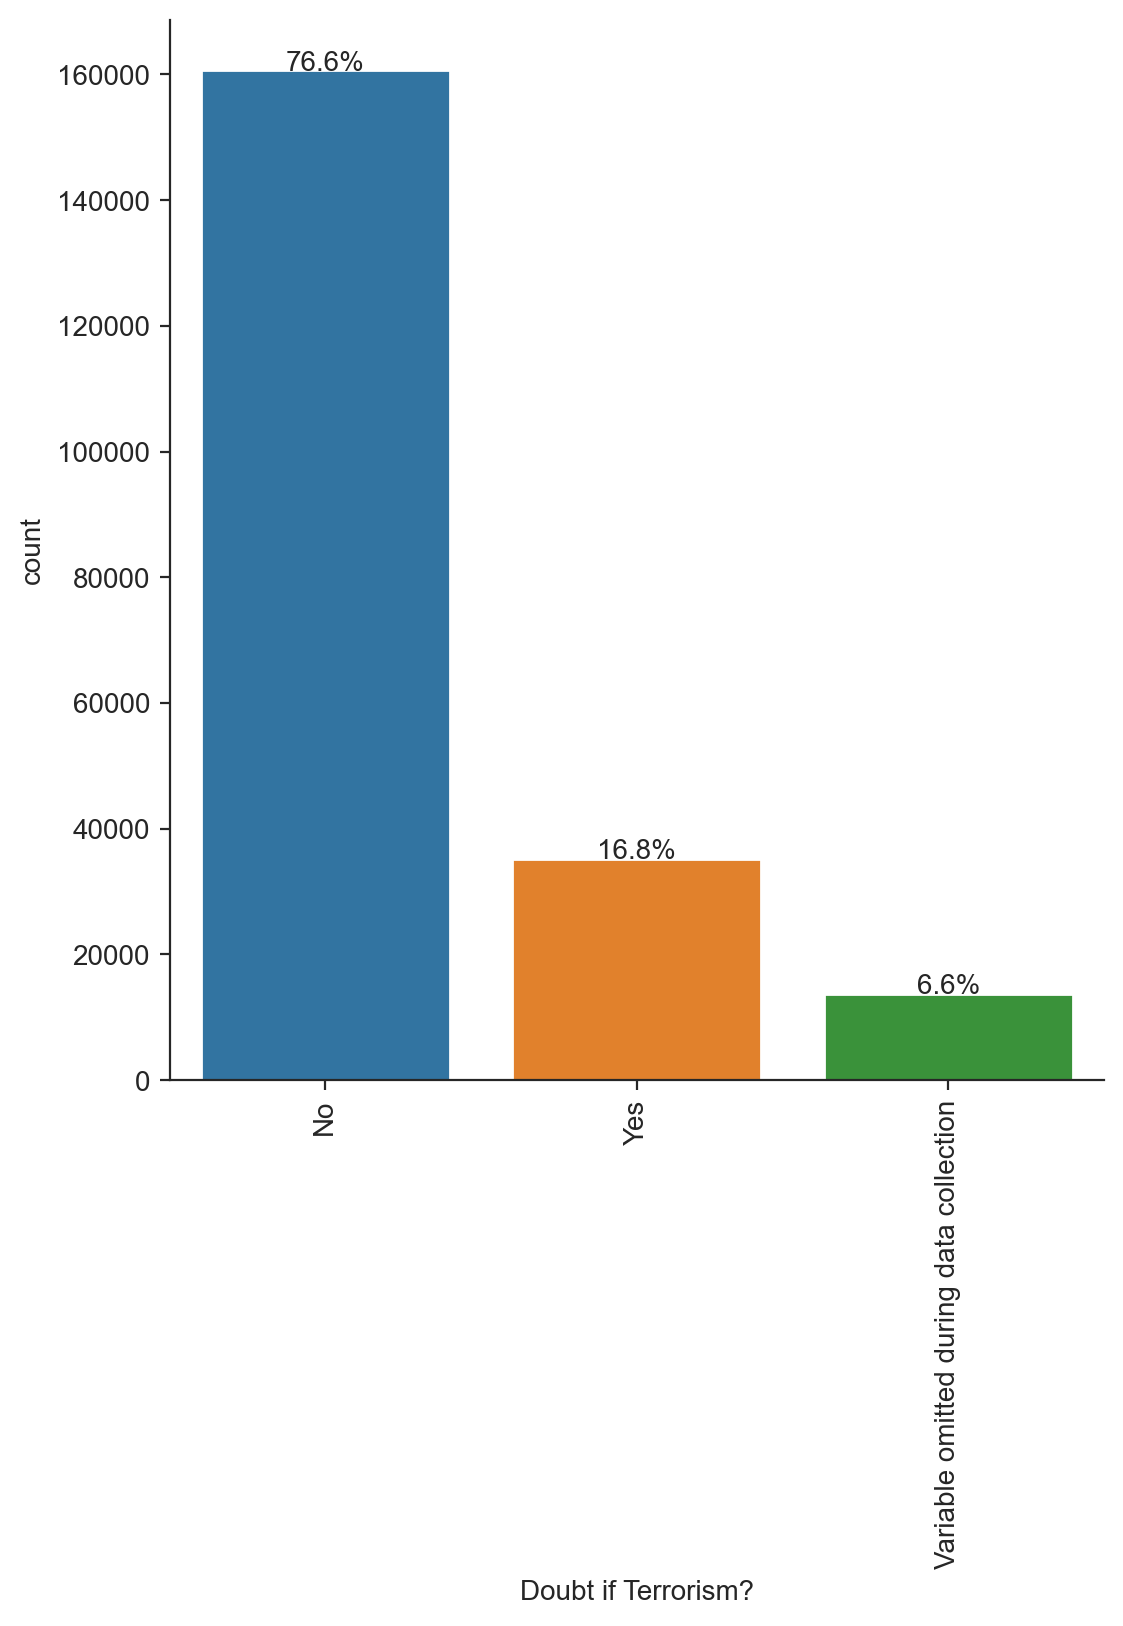

In [18]:
plot_categorical_variable_with_percentage(df, cat_cols[9])

- Around `77%` of the attacks are undoubtedly terrorist attack, rest `17%` are doubted and remaing `6%` have no data available.
- <span style="color: red;"> We can look deeper into attacks where there is no doubt that they were terrorist attacks.</span>


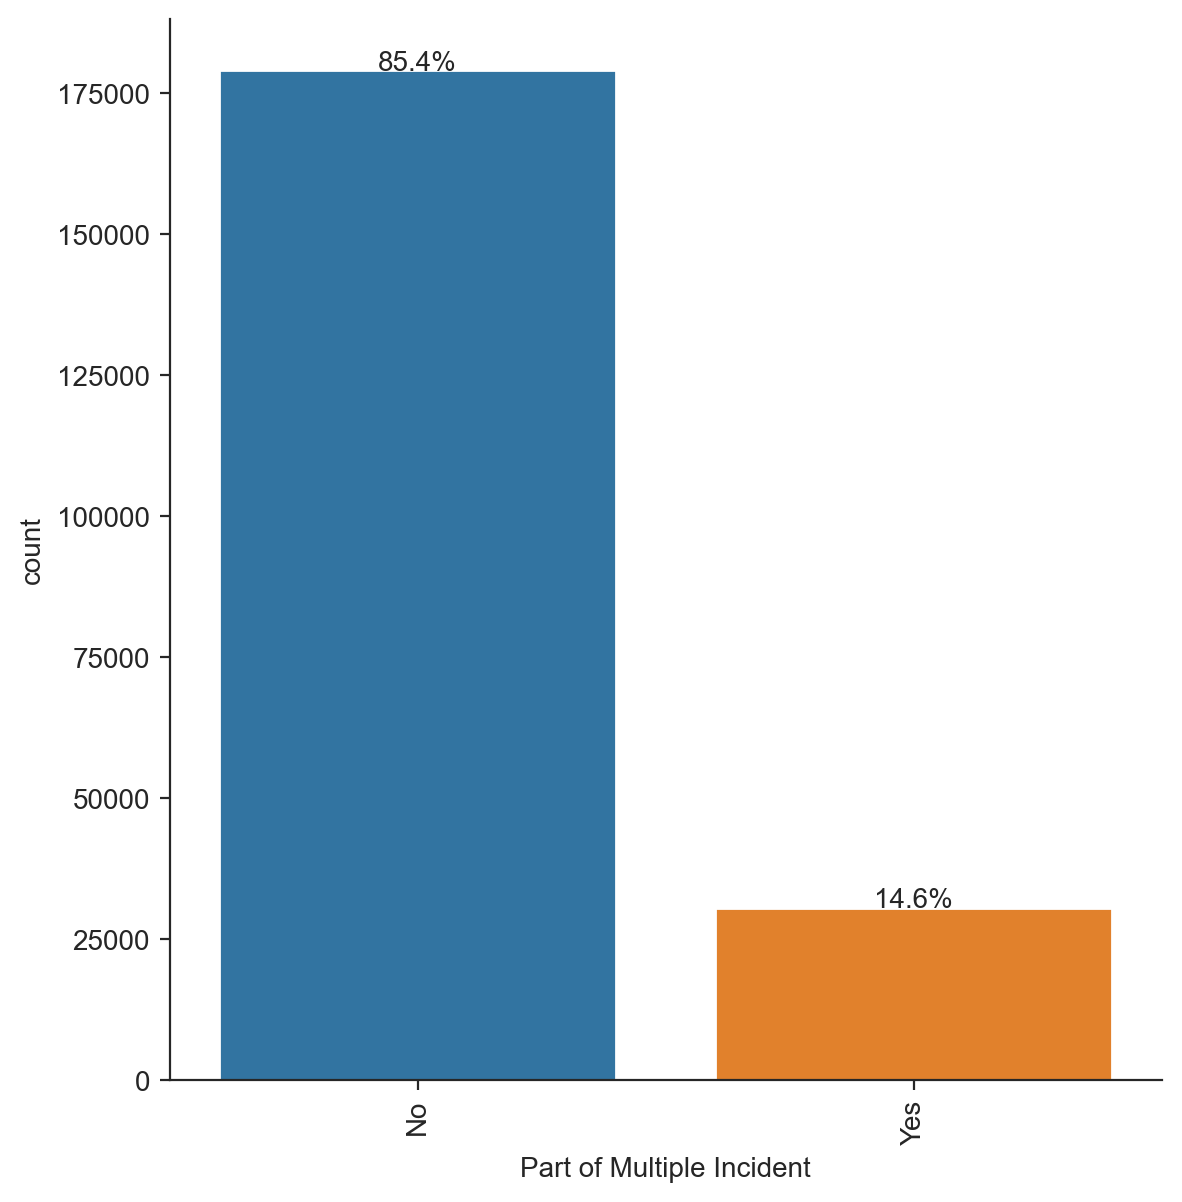

In [19]:
plot_categorical_variable_with_percentage(df, cat_cols[10])

- Around `85%` of the attacks are not a part of multiple incident, rest `15%` are part of a multiple incident.
- <span style="color: red;"> We can look deeper into attacks where they were a part of multiple incident.</span>

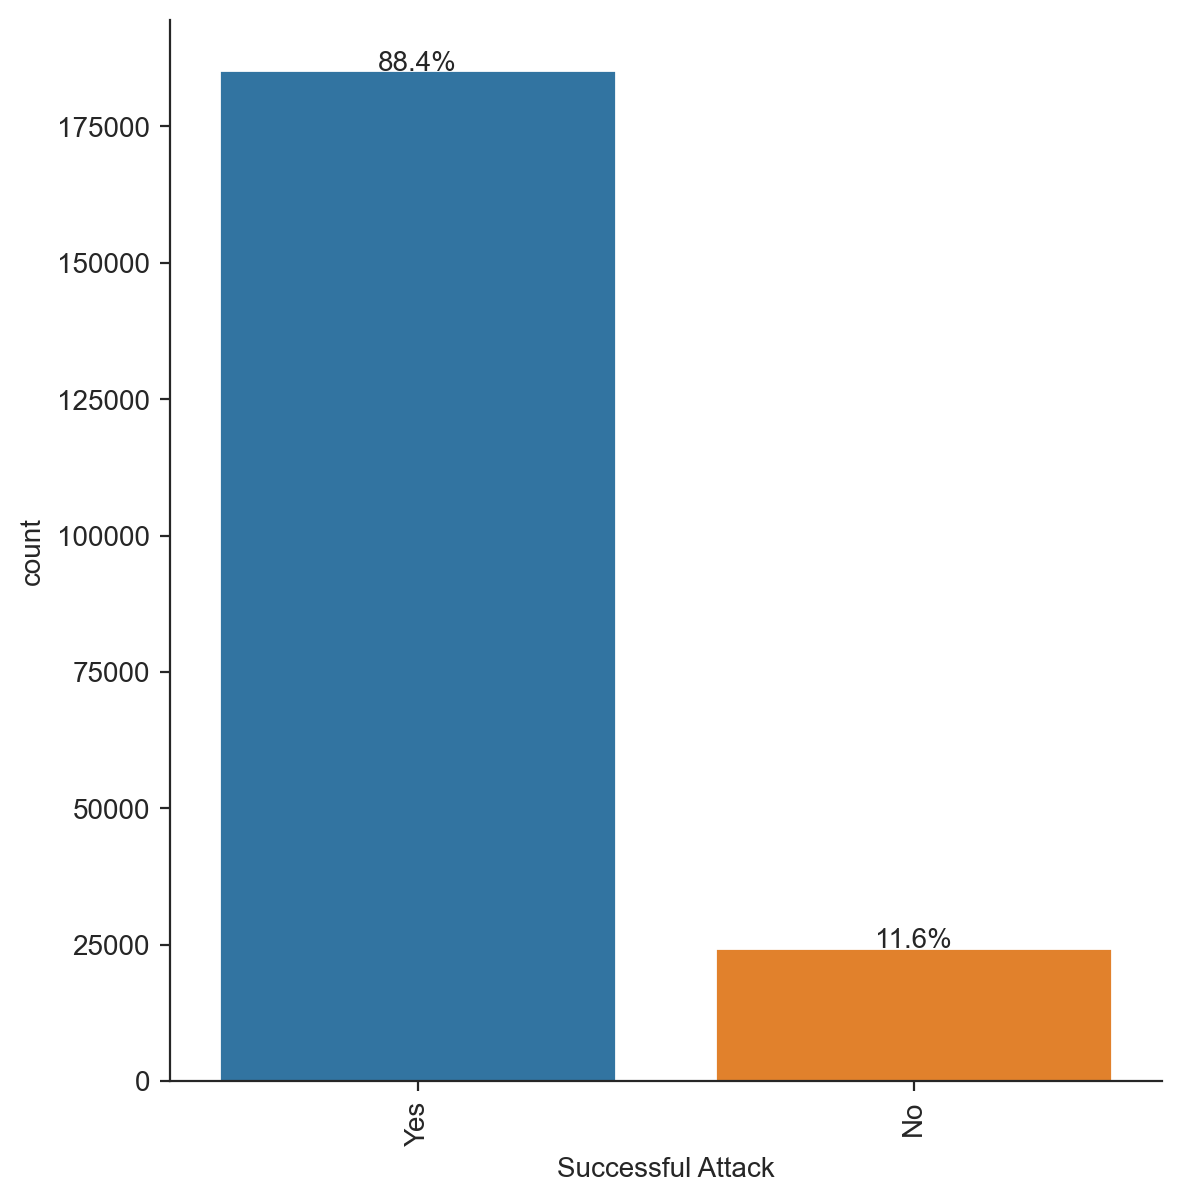

In [20]:
plot_categorical_variable_with_percentage(df, cat_cols[11])

- Majority of attacks, around `88%` of the attacks were successful, rest `12%` were not successful.
- <span style="color: red;"> Look for the regions and countries where the attacks were not successful, apart from that look deeper into the unsuccessful attack and successful ones in context to other cateogrical variables.</span>

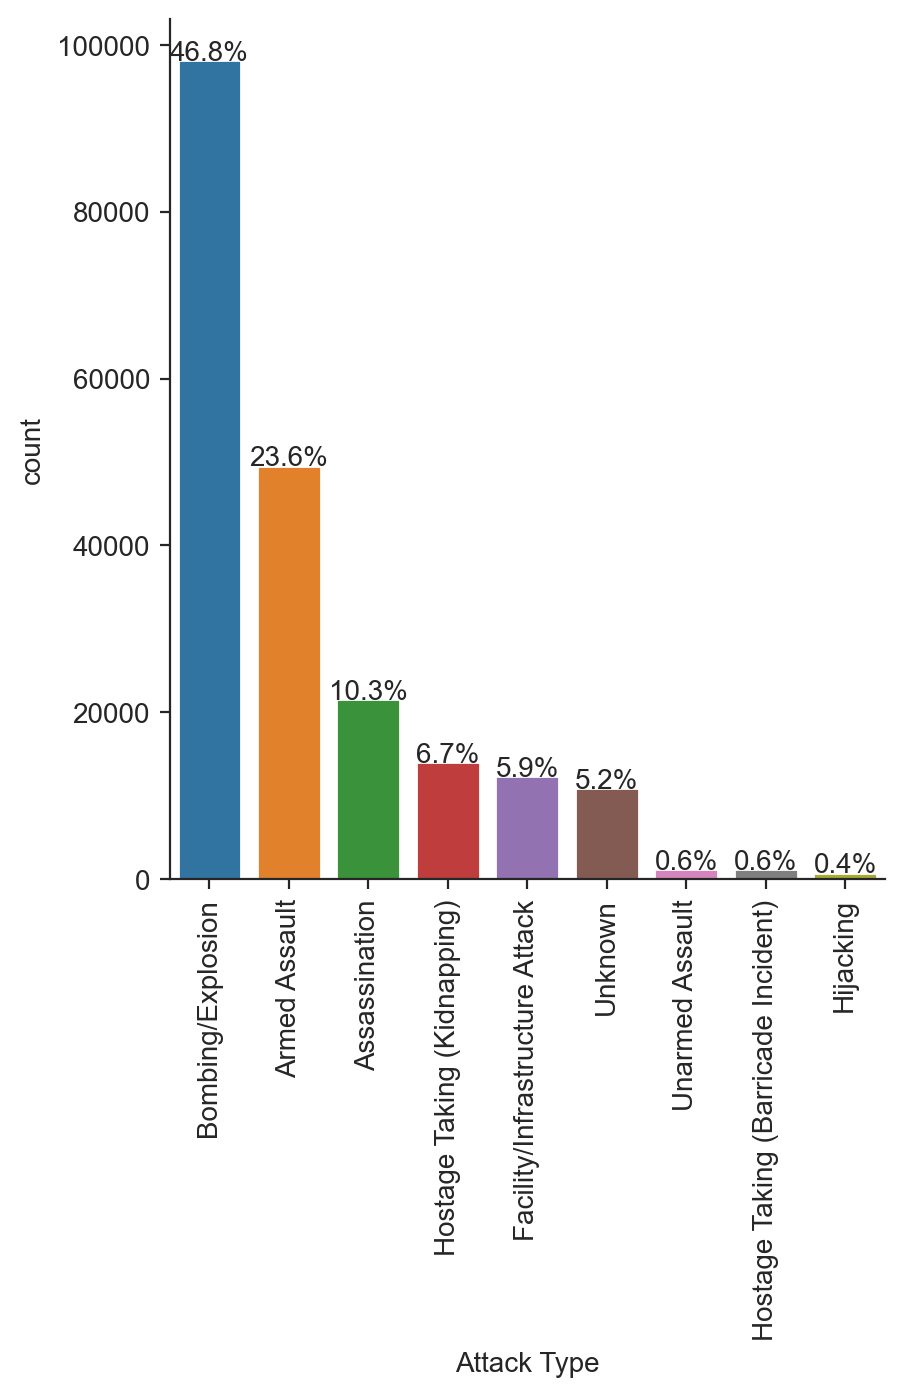

In [21]:

# Create the catplot with the specified figsize
plot = sns.catplot(data=df, kind='count', x='Attack Type', order=df['Attack Type'].value_counts(ascending=False).index)

# Rotate x-axis titles by 90 degrees
plt.xticks(rotation=90)

# Calculate the total count
total = len(df)

# Annotate the percentage above each bar
ax = plot.facet_axis(0, 0)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()



- Most number of attacks are `Bombing/Explosion` (`47%`) followed by `Armed Assault` (`24%`) and `Assassination` (`10%`)

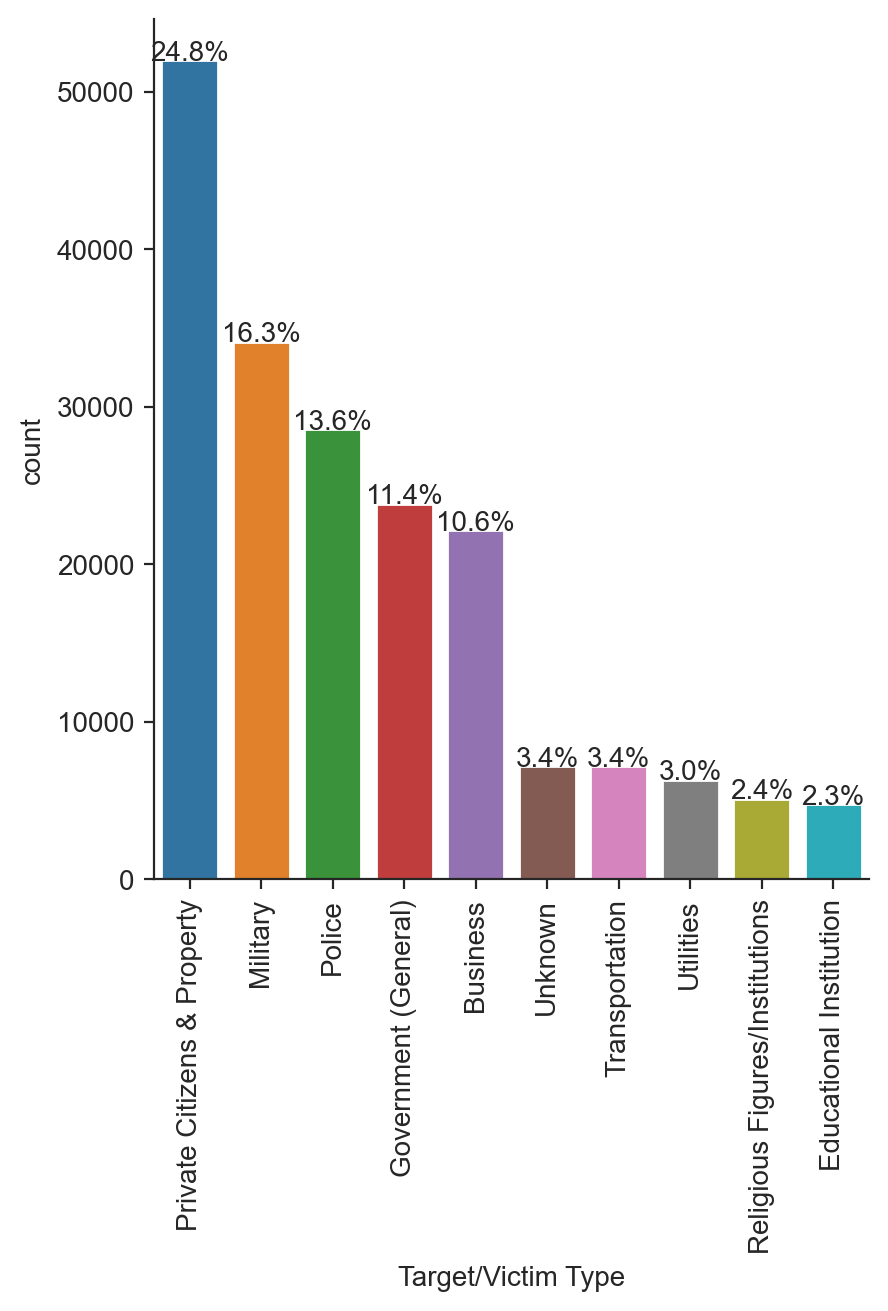

In [22]:
plot_categorical_variable_with_percentage(df, cat_cols[14], top_n=10)

- `Private Citizens & Property`(`24.8%`) have been targeted the most, followed by, `Military (16.3%)`), `Police (13.6%)`, `Government (11.4%)` and `Business (10.6%)`
- Columns like `Target/Victim Subtype` and `Specific Target/Victim` have not that much relevant information as the categories are somewhat uniformely distributed
- Similar goes for `Name of Entitiy` column as it has `20%` missing values and `10%` are `unknown` values and rest `70%` data is uniformely distributed within the categories.

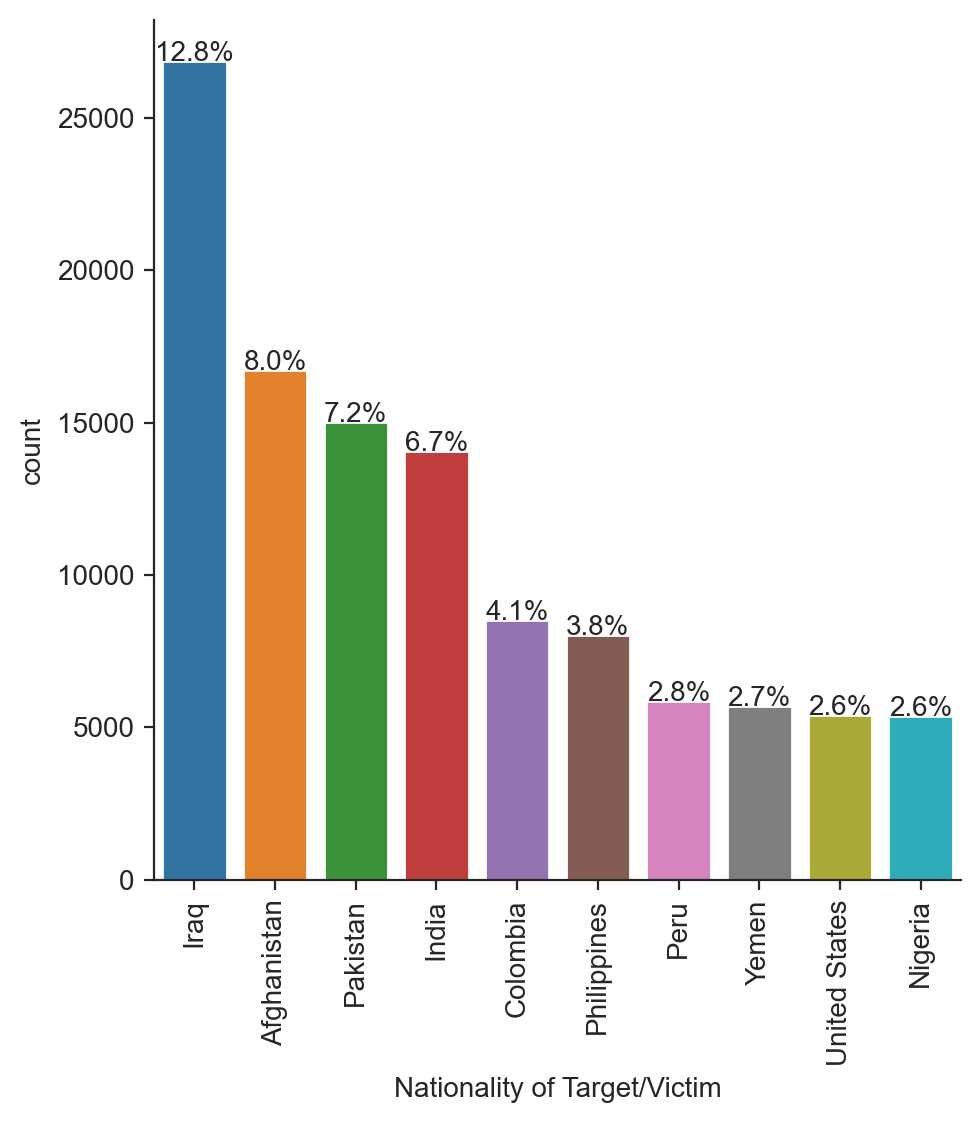

In [23]:
plot_categorical_variable_with_percentage(df, cat_cols[18], top_n=10)

- As the number of attacks were highest in `Iraq`, and the `Nationality of Target/Victim` in majority is `Iraqi` followed by `Afghanistan`, `Pakistan` and `India`, that is same order as that of `Country` with attacks in descending order.
- There are high chances that these two columns (`Nationality of Target/Victim` and `Country`) are highly correlated which makes sense intuitively meaning that country in which attack took place is the one whose residents will be injured or attacked the most.

In [24]:
df_filtered = df[df['Perpetrator Group Name'] != 'Unknown']

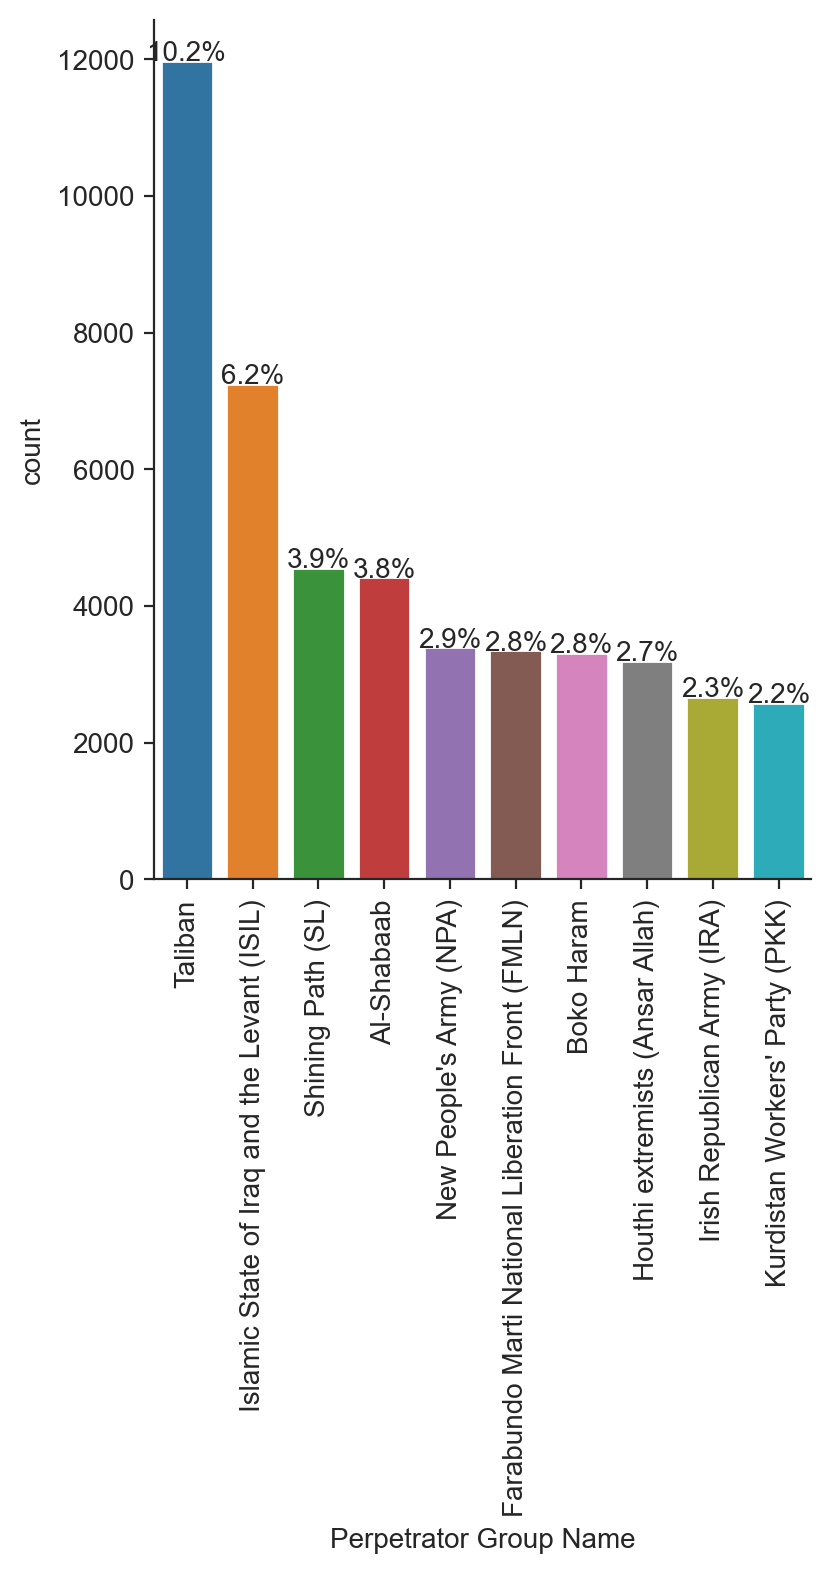

In [25]:
plot_categorical_variable_with_percentage(df_filtered, 'Perpetrator Group Name', top_n=10)

- Around `44%` are `Unknown` values in `Perpetrator Group Name`, so we will look only into the attacks where the `Perpetrator Group Name` is known.
- `Taliban (10.2%)` is the most active perpetrator group followed by `Islamic State of Iraq and the Levant (ISIL) (6.2%)`,`Shining Path (SL) (3.9%)` and `Al-Shabaab (3.8%)`.
- <span style="color: red;"> Look more into the groups which are most active in the most attacked countries and regions.</span>

## Bivariate + Multivariate Analysis of Variables

- We would be performing `Bivariate` and `Multivariate` analysis together. It would be more time efficient and we would be able to make visualisation which would give us multiple insights without make too may plots.

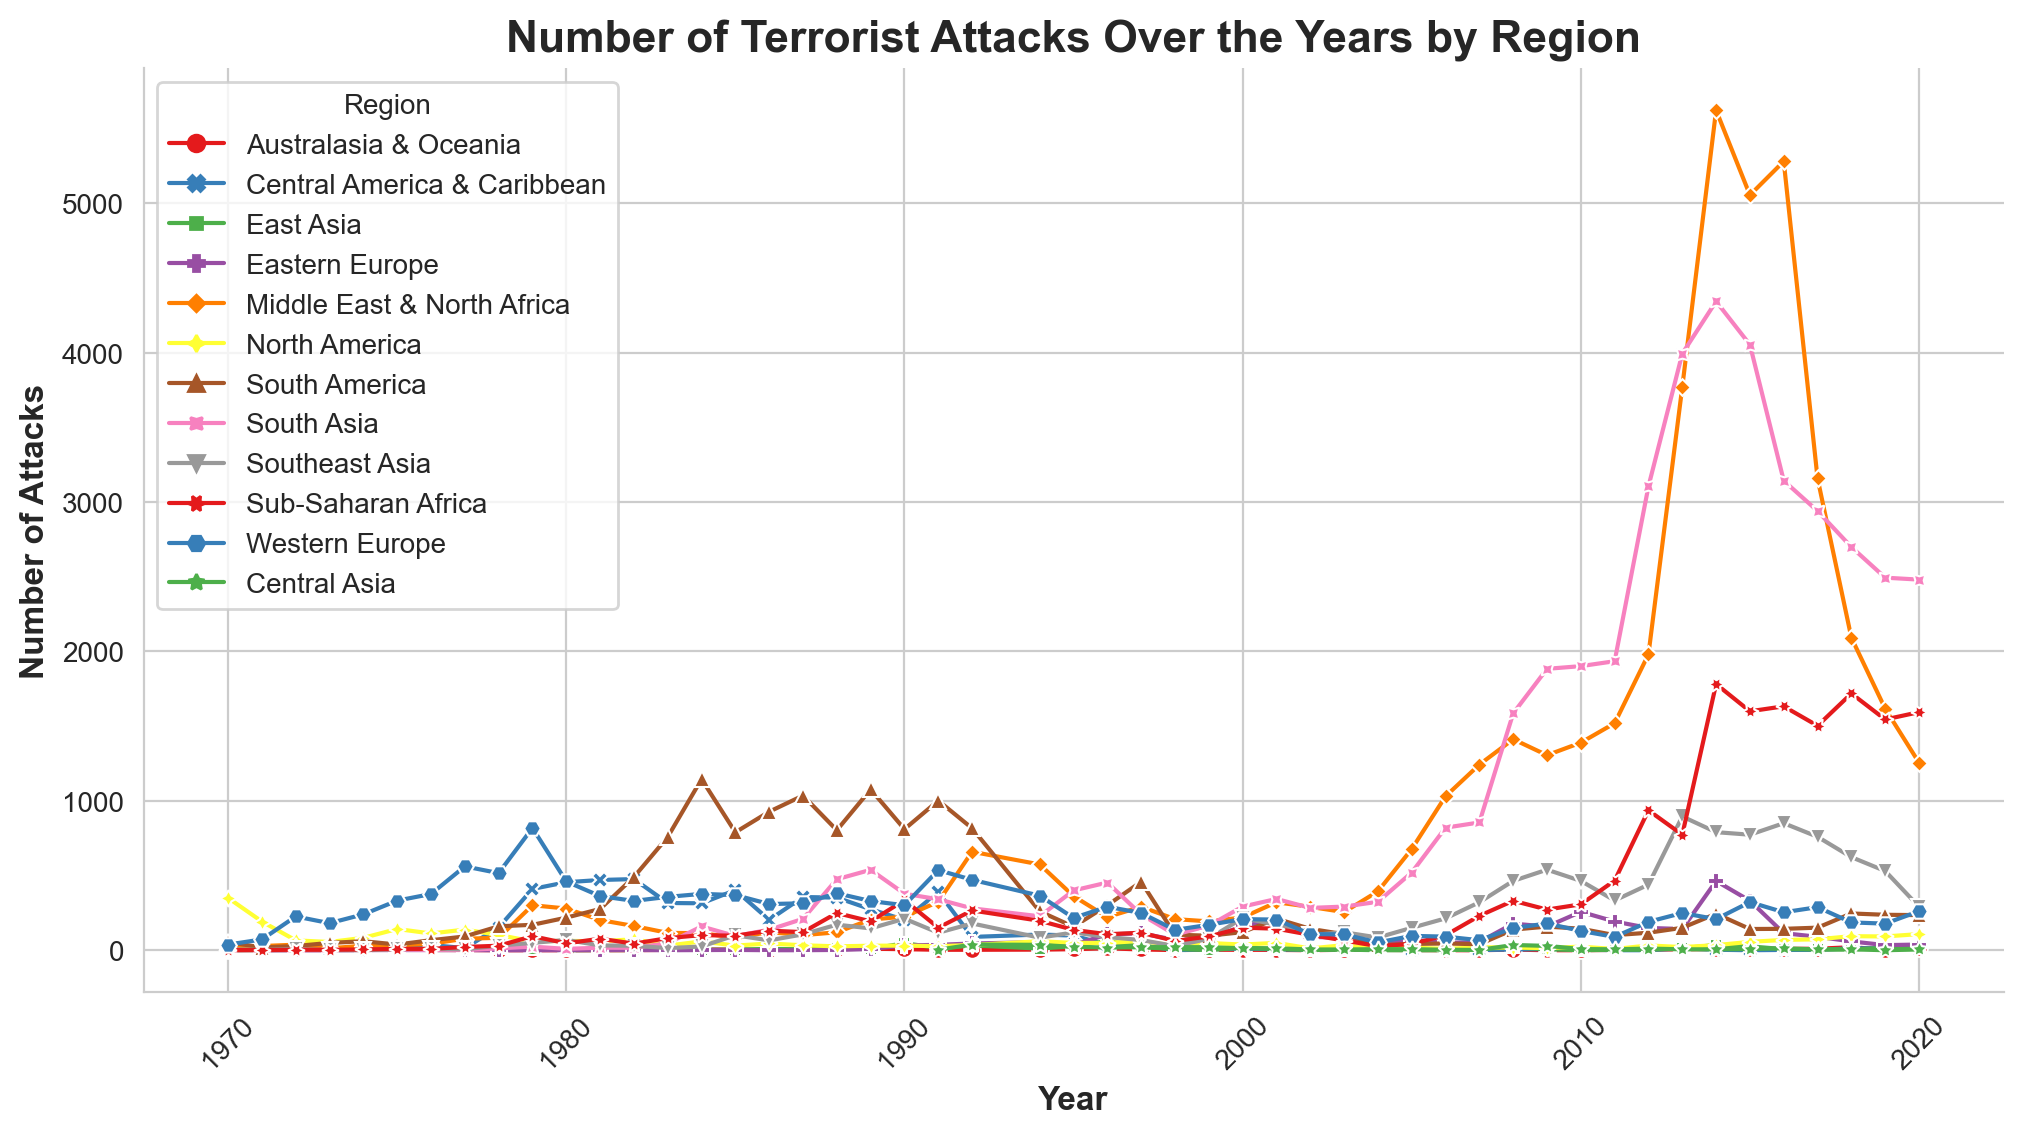

In [27]:
# Group the data by 'Year' and 'Region' and calculate the sum of attacks
yearly_region_attacks = df[df['Doubt if Terrorism?'] == 'No'].groupby(['Year', 'Region'])['Year'].count().reset_index(name='Number of Attacks')

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.lineplot(data=yearly_region_attacks, x="Year", y="Number of Attacks", hue="Region", style="Region",
                  markers=True, dashes=False, palette="Set1")
# he palette argument in sns.lineplot is used to set a color palette for different regions, making it easier to distinguish between them.

# Customize the plot
plt.title("Number of Terrorist Attacks Over the Years by Region", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Number of Attacks", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
sns.despine() # removes the top and right spines of the plot, making it cleaner.

plt.show()

- It can be observed that number of terrorist attacks have **increased** over the years and making `Middle East & North Africa` and `South Asia` as the regions with **Maximum attacks.**

Now, as reported earlier in our univariate analysis, let us look deeper into the attacks which extended over 24 hours.

## <center> <span style="color:red">Terrorist Attacks extending over a Day</span> </center>

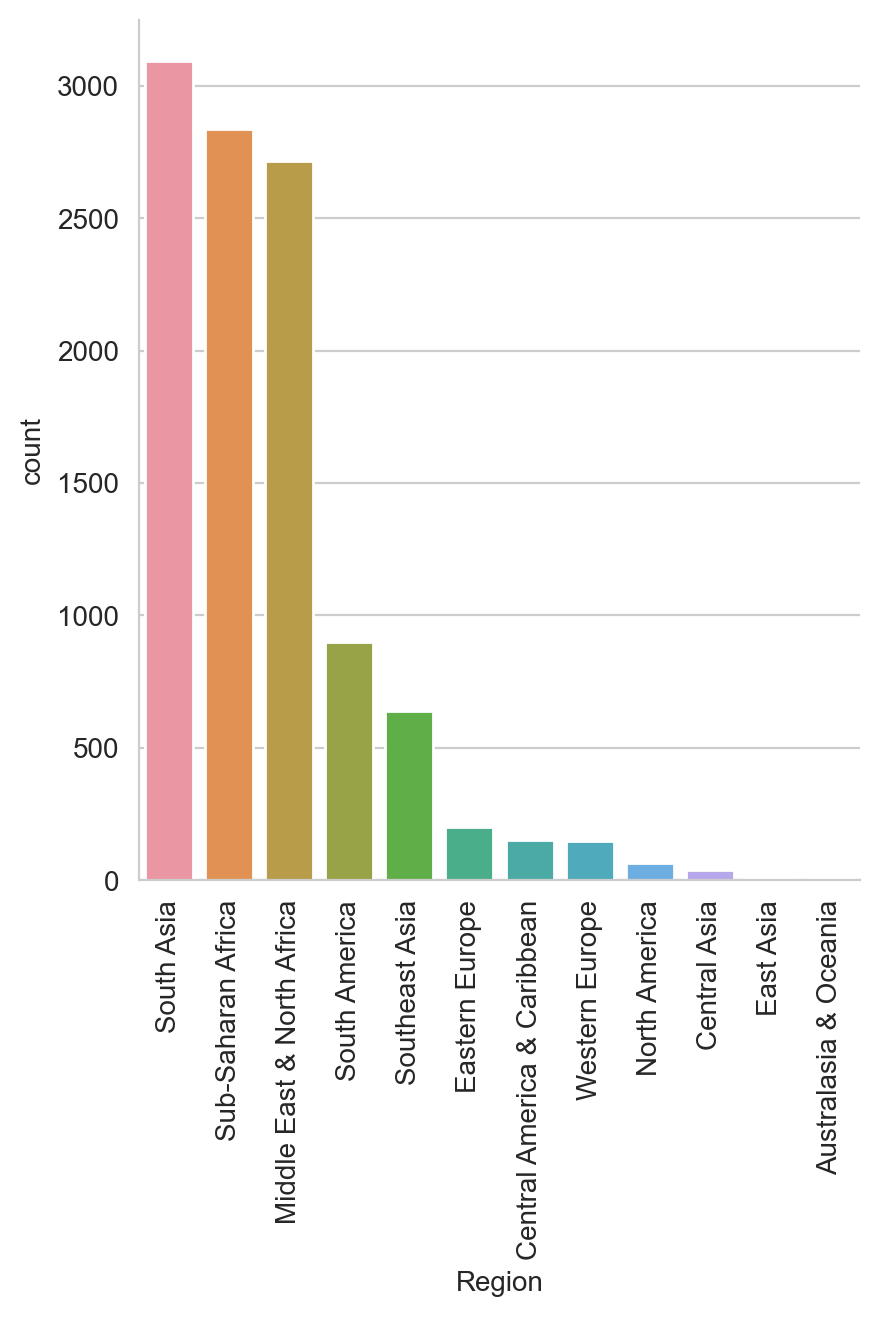

In [28]:
attacks_beyond_24 = df[df['Extended Incident?'] == 'Yes']  # Records where attacks extended 24 hours

order = list(attacks_beyond_24['Region'].value_counts().index)   # order of Region in descending
sns.catplot(x='Region', kind='count', data=attacks_beyond_24, order = order)
plt.xticks(rotation=90)
plt.show()

- `Region`s where attacks extended over 24 hours are `South Asia`, `Sub-Saharan Africa` and `Middle East & North Africa` (in descending order).
- We will now look deeper into the countries where these incidents extended over 24 hours.

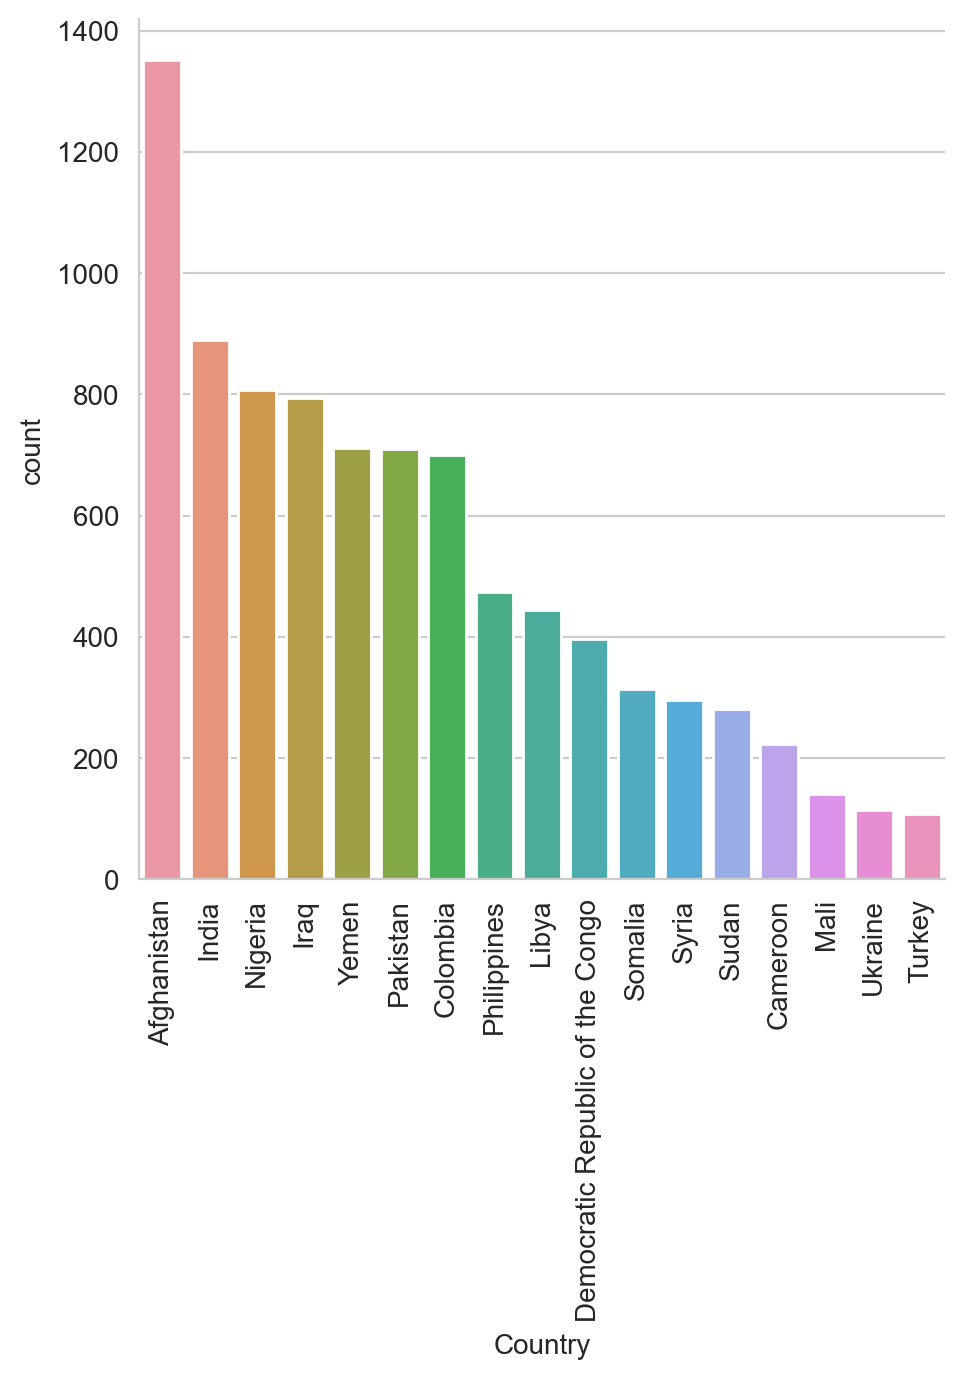

In [29]:
order = list(attacks_beyond_24['Country'].value_counts()[:17].index)   # order of Region in descending
sns.catplot(x='Country', kind='count', data=attacks_beyond_24, order = order)
plt.xticks(rotation=90)
plt.show()

- The countries where attacks extended 24 hours are `Afghanistan` with max attacks followed by `India`, `Nigeria`, `Iraq` etc.
- Let us further look into `Attack Type`, `Perpetrator Group Name` and `Weapon Type` for these particular attacks.

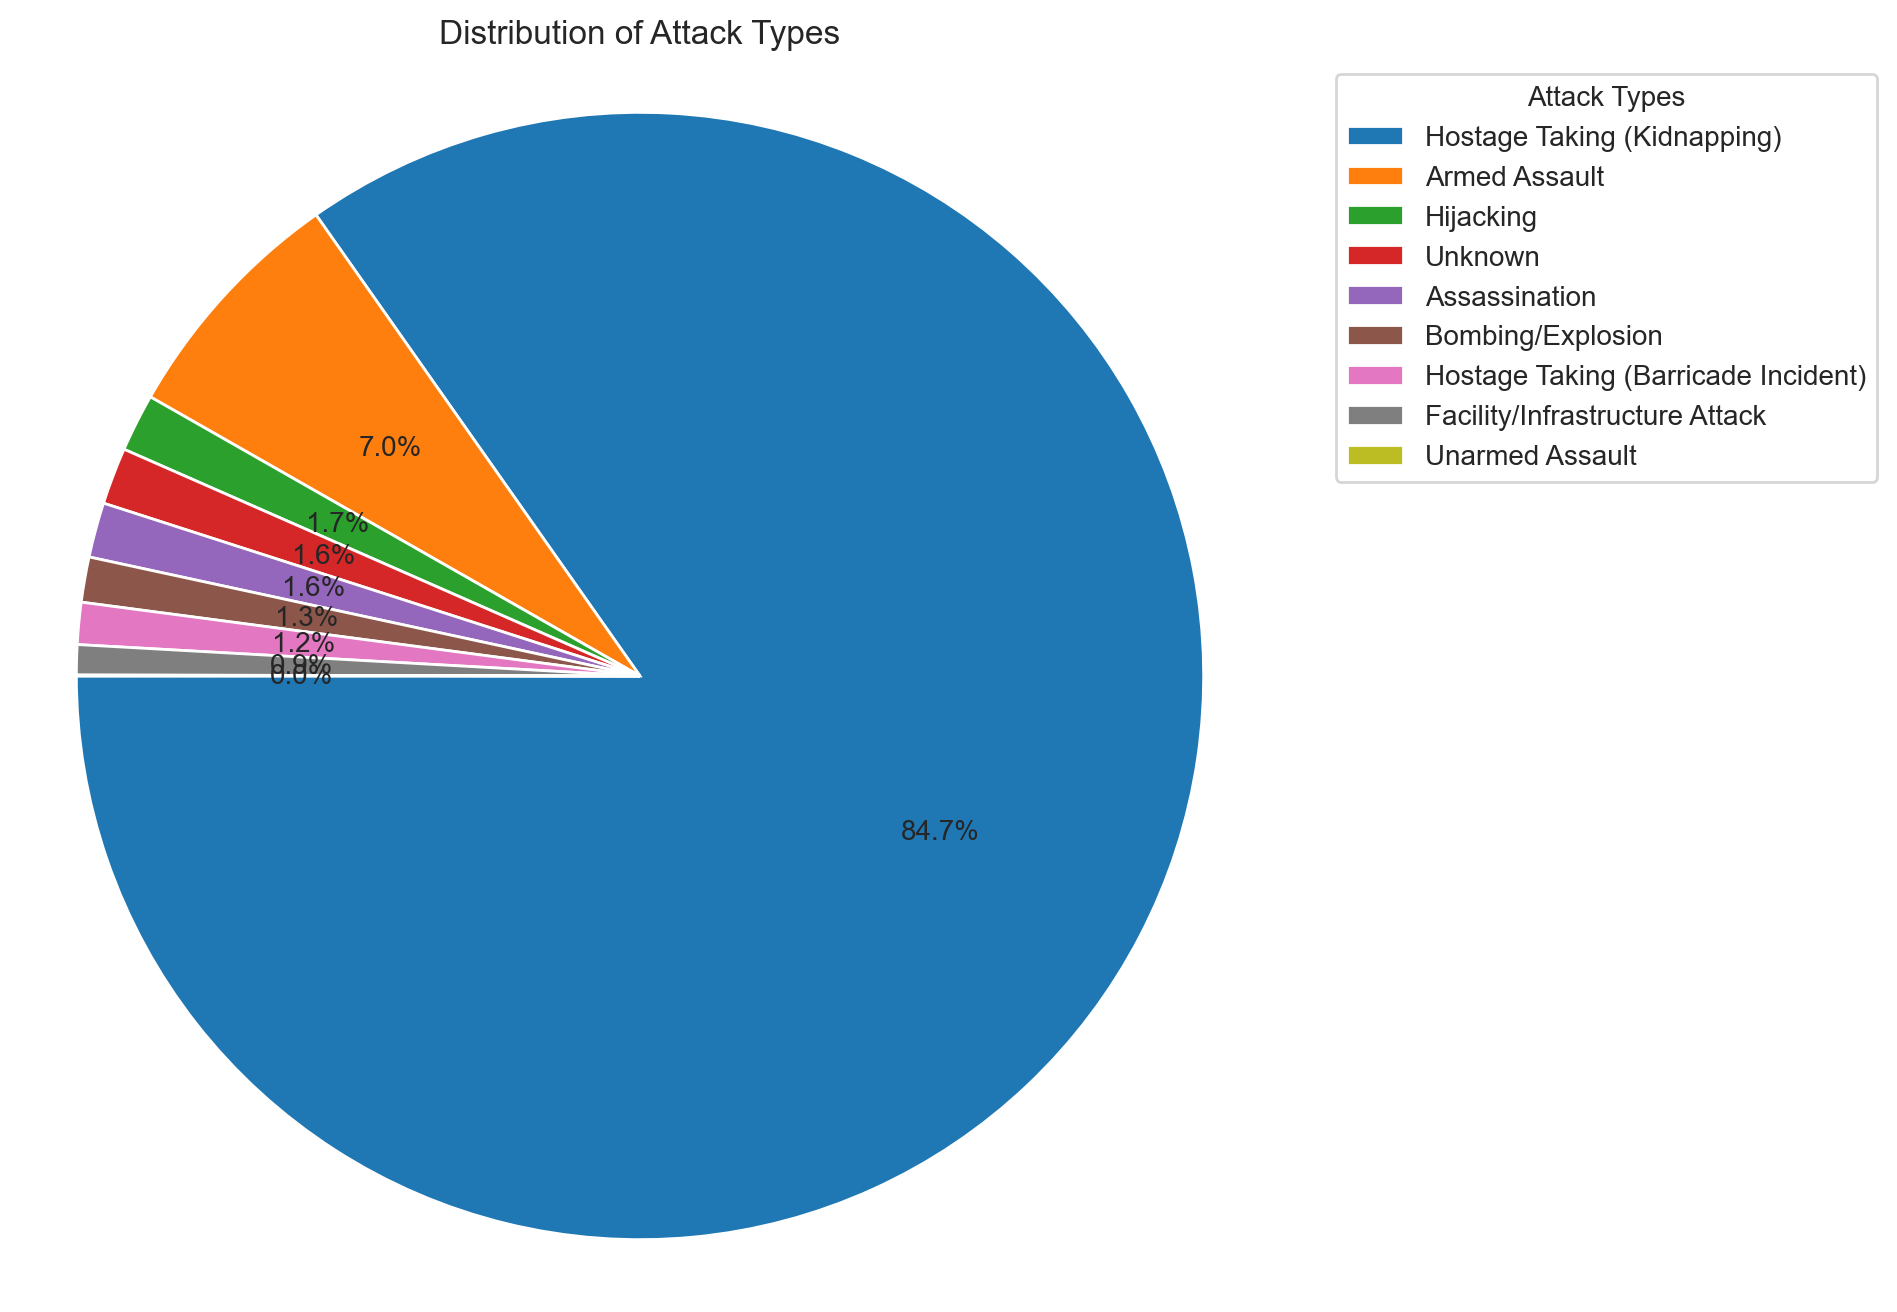

In [30]:
output = pd.DataFrame(attacks_beyond_24['Attack Type'].value_counts().reset_index())

output.rename(columns={'index':'Attack Type', 'Attack Type':'Count'}, inplace=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(output['Count'], autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of Attack Types')

# Add a legend
plt.legend(output['Attack Type'], title="Attack Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

- From the pie chart, it can be observed that majority (around `85%`) of the attacks involved `Hostage Taking`, followed by `Armed Assault` (around `7%`)


<AxesSubplot: xlabel='Perpetrator Group Name'>

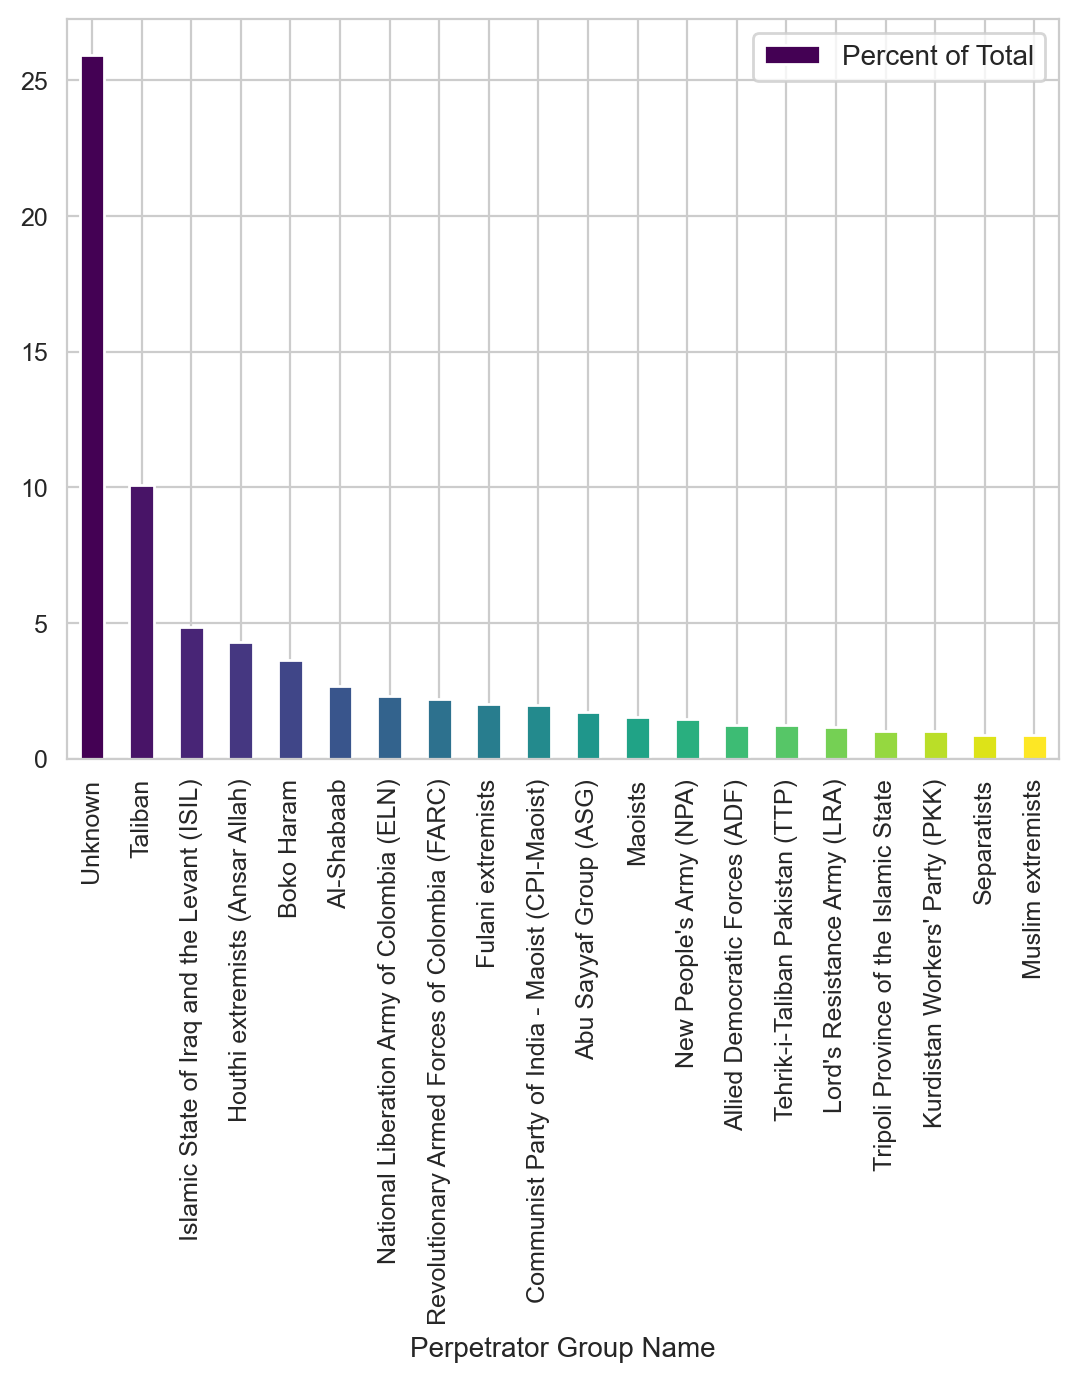

In [31]:
output = pd.DataFrame((attacks_beyond_24['Perpetrator Group Name'].value_counts(normalize=True)*100)[:20]).reset_index() \
.rename(columns={'index':'Perpetrator Group Name', 'Perpetrator Group Name': 'Percent of Total'})

colors = plt.cm.viridis(np.linspace(0, 1, len(output)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

output.plot.bar(x='Perpetrator Group Name', y='Percent of Total', fontsize='9', color=colors)

- Although majority of attacks have `Unknown` (`~26%`) group name, the most active Perpetrator Groups are `Taliban` followed by `ISIL`, `Ansar Allah`, `Boko Haram`, `Al-Shabaab` etc.

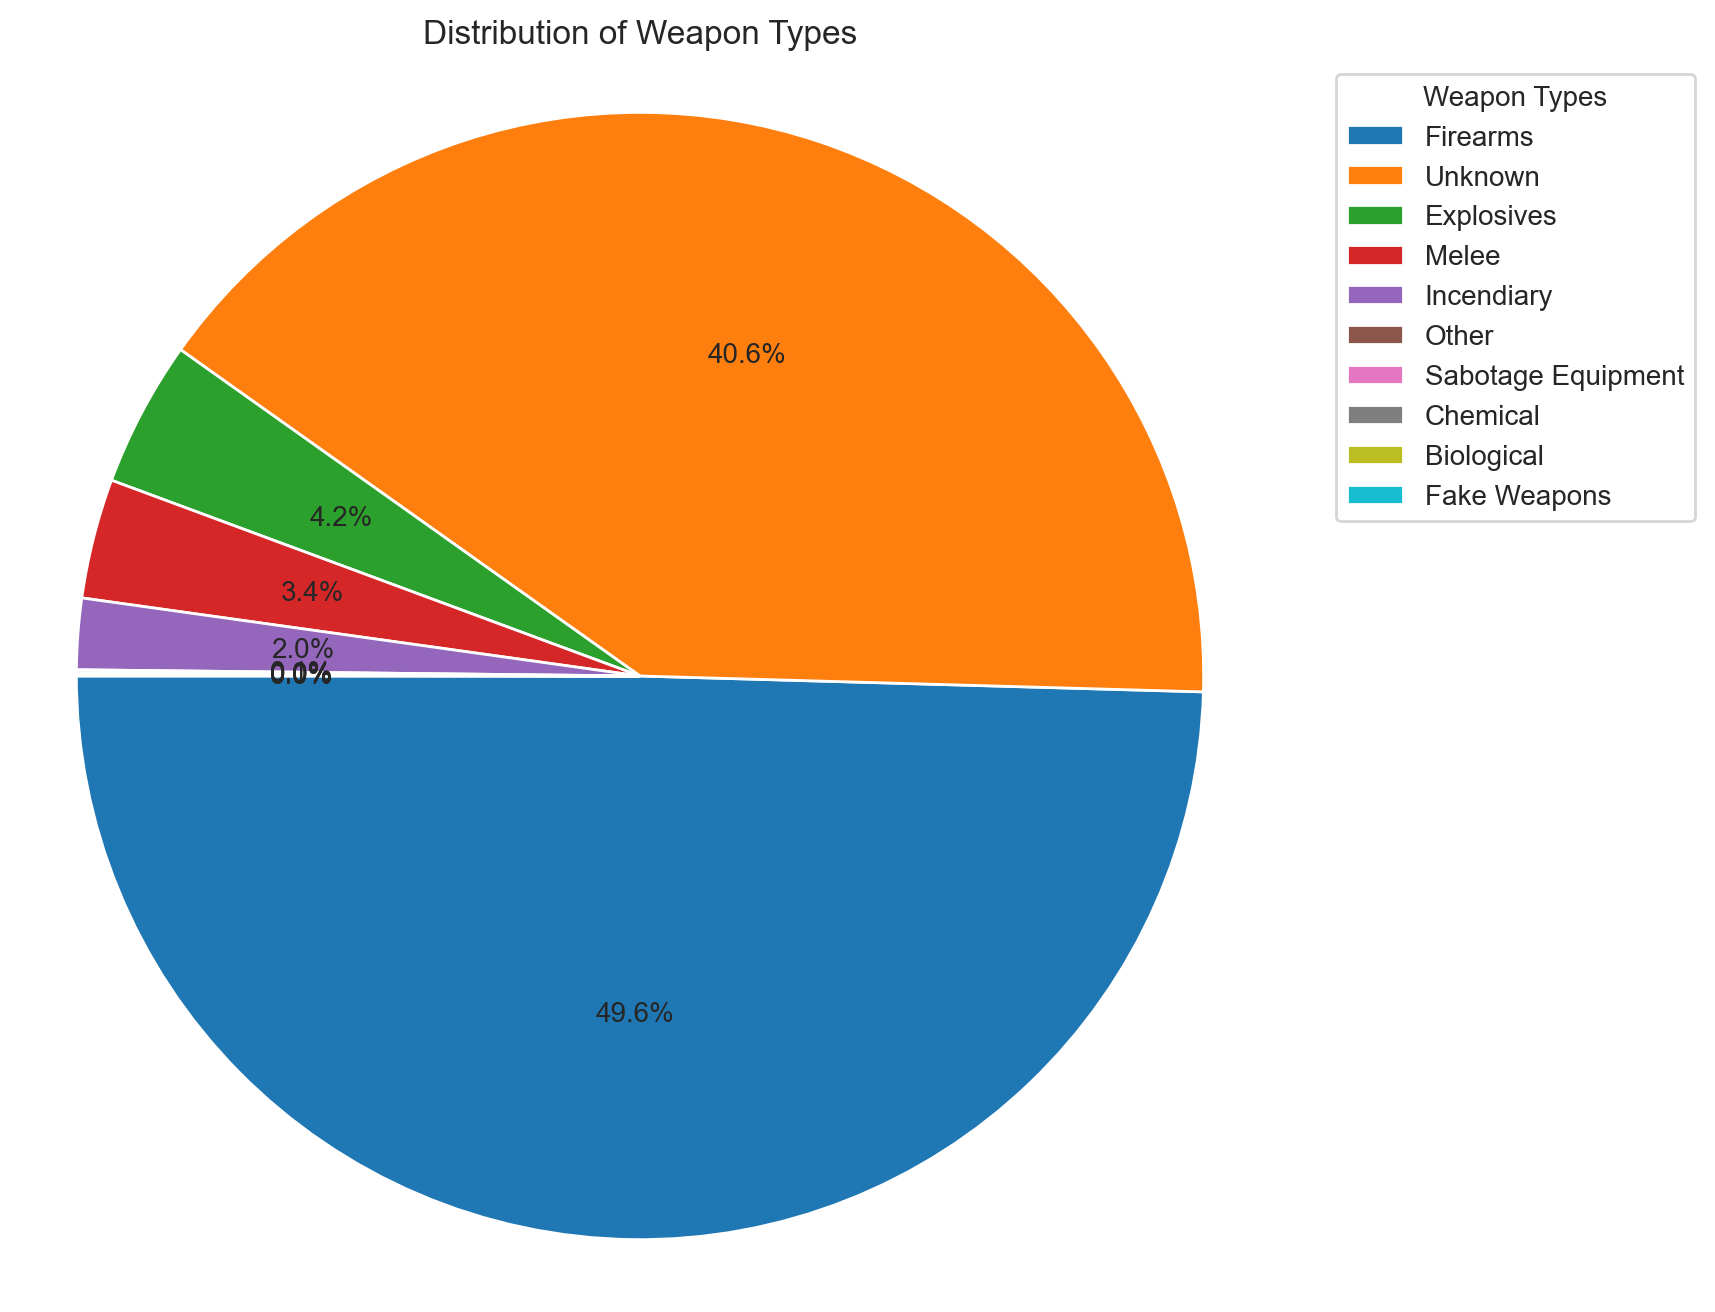

In [32]:
output = pd.DataFrame(attacks_beyond_24['Weapon Type'].value_counts().reset_index())

output.rename(columns={'index':'Weapon Type', 'Weapon Type':'Count'}, inplace=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(output['Count'], autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of Weapon Types')

# Add a legend
plt.legend(output['Weapon Type'], title="Weapon Types", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

- `Firearms` are very common `Weapon Type` followed by a category of `Unknown` weapon types.
- `Explosives` and `Melee` weapons are also being used by in a comparatively small proportion.

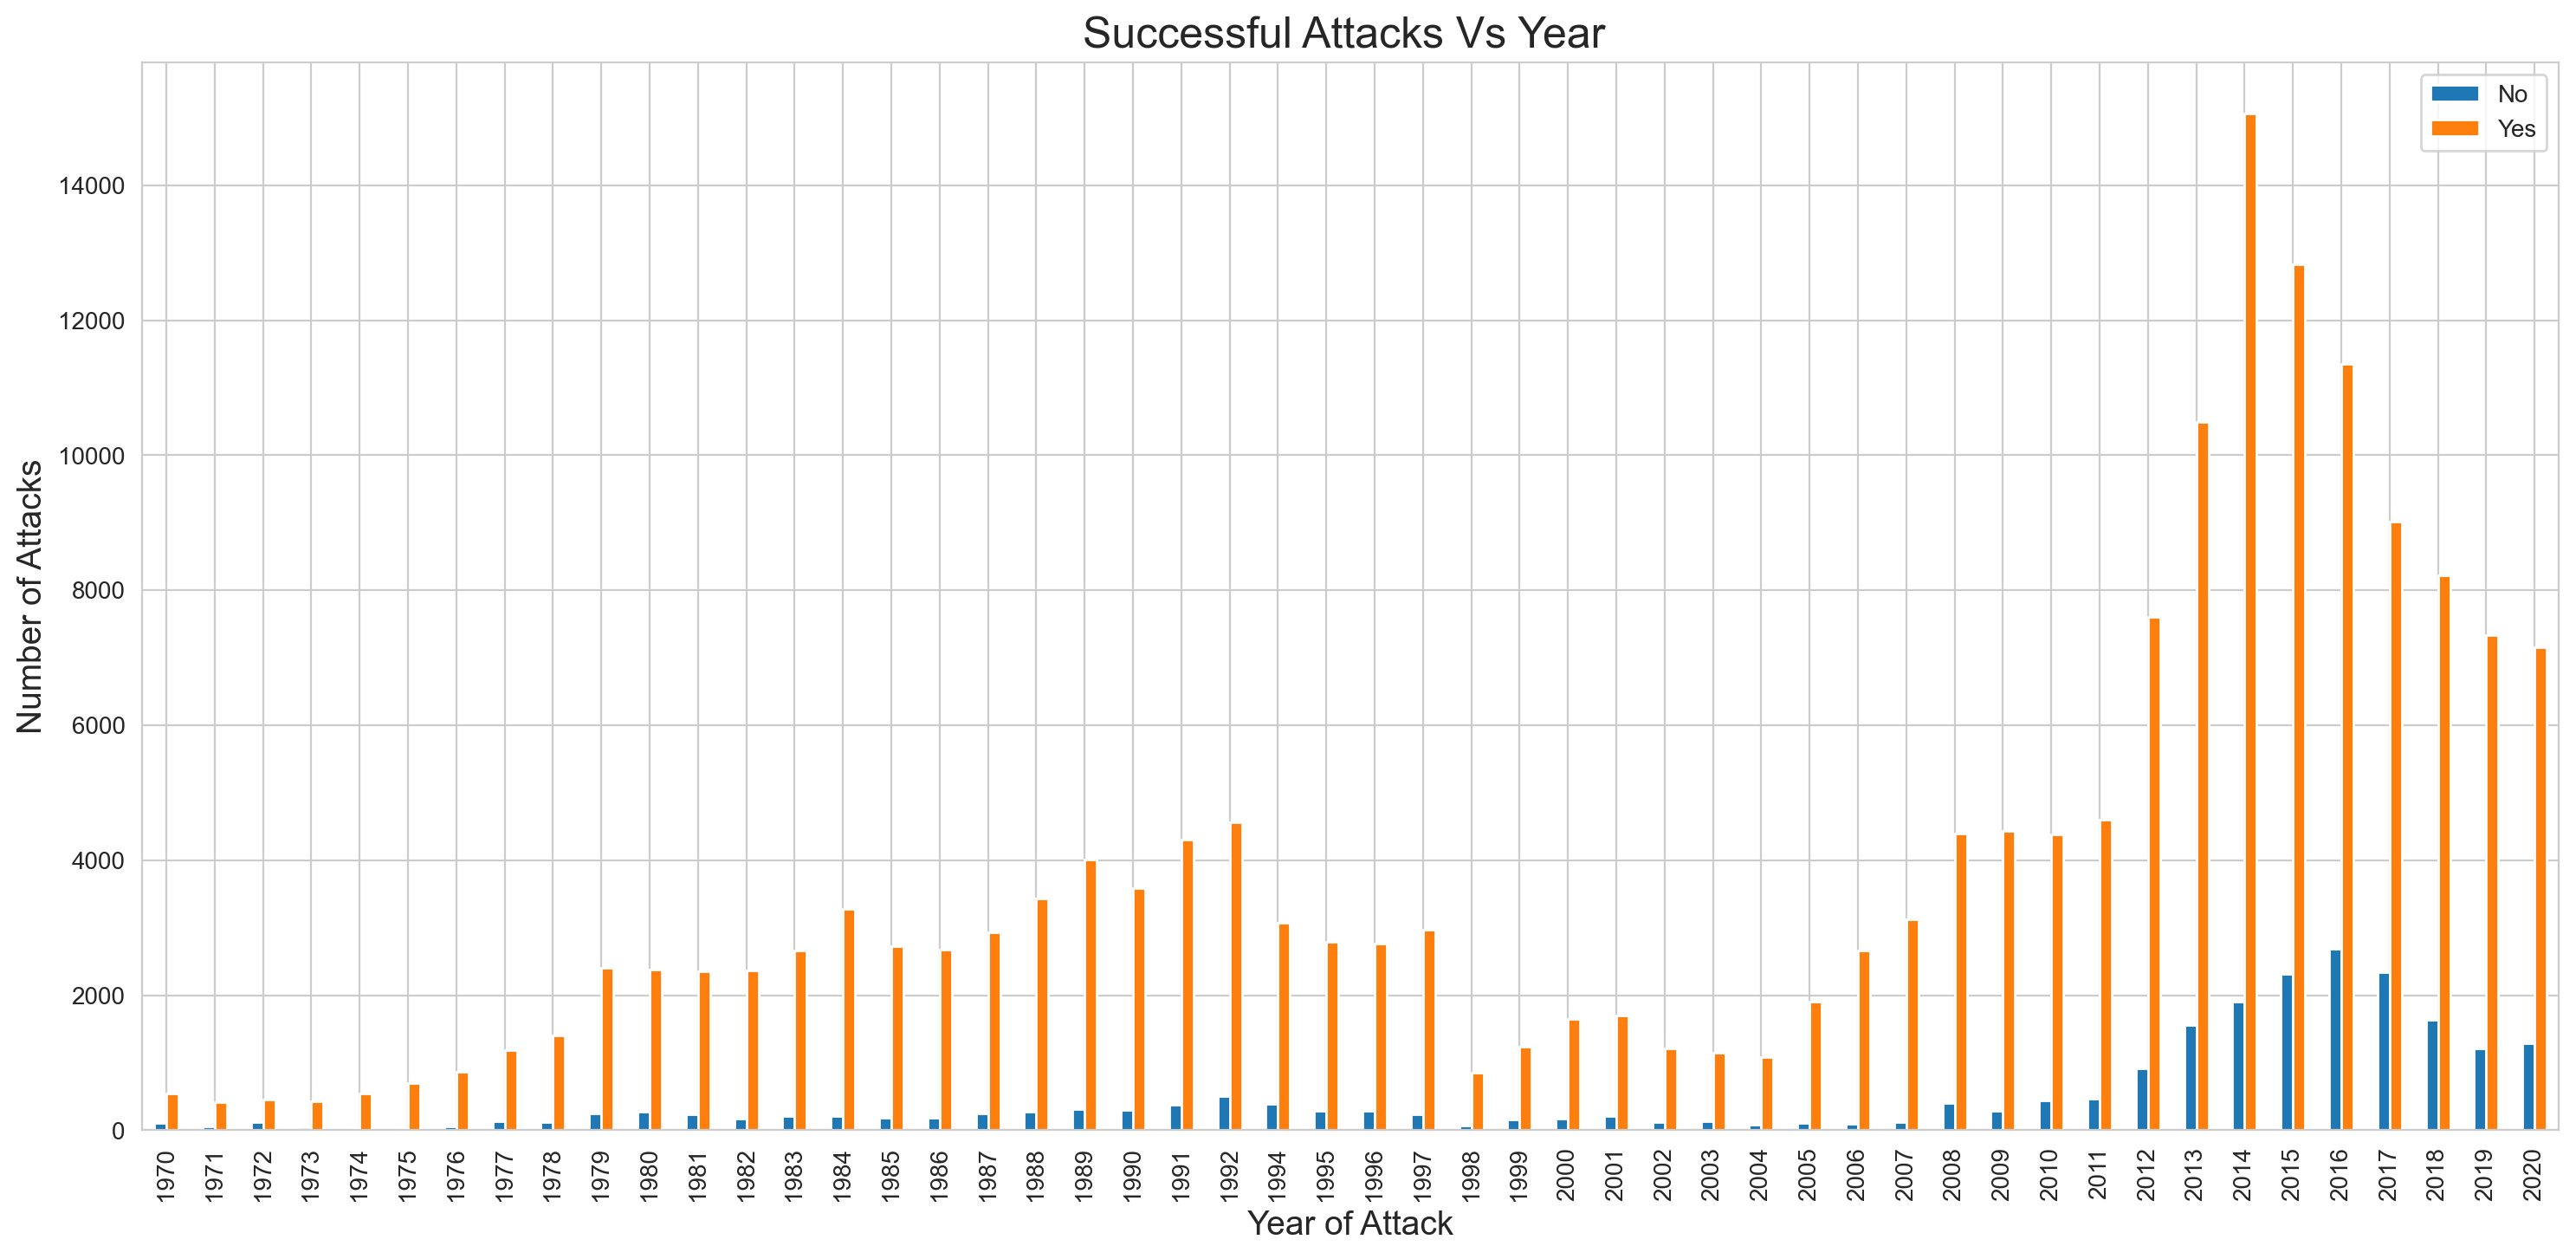

In [34]:
# Checking successful and unsuccessful attacks yearly

pd.crosstab(df['Year'],df['Successful Attack']).plot(kind='bar',stacked = False,figsize = (18,8))
plt.xlabel("Year of Attack",fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.title("Successful Attacks Vs Year ",fontsize= 18)
plt.legend(['No', 'Yes'])
plt.show()

- Attacks gradually increased becoming highest at `2014`, with successful attacks increasing in count and then decreasing.

<AxesSubplot: xlabel='Region'>

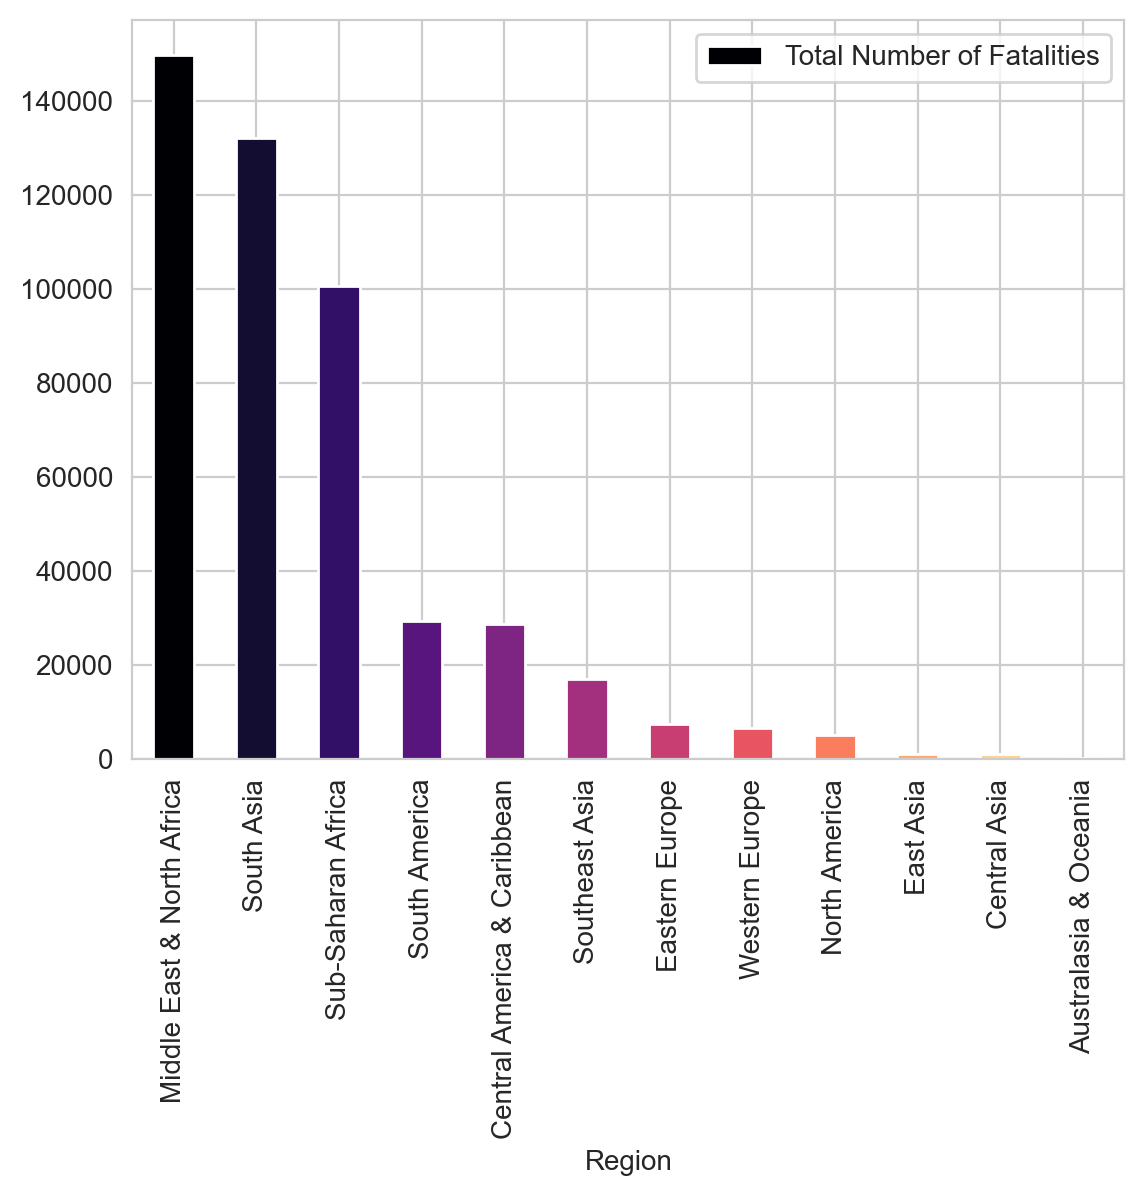

In [35]:
filtered = pd.DataFrame(df[df['Total Number of Fatalities'] != -99].groupby('Region')['Total Number of Fatalities'].sum().reset_index())\
            .sort_values('Total Number of Fatalities', ascending=False)

colors = plt.cm.magma(np.linspace(0, 1, len(filtered)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

filtered.plot.bar(x='Region', y='Total Number of Fatalities', fontsize='10', color=colors)

- `Middle East & North Africa` has maximum number of fatalities followed by `South Asia` and `Sub-Saharan Africa`
- We can look deeper into these regions to look for countries which are hostspot for attacks, prominent victim type and other categories.

In [36]:
from ipywidgets import interact, widgets

filtered = df[(df['Region'].isin(['Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']))
              & (df['Total Number of Fatalities'] != -99)]

# Group by 'Region' and 'Country', and sum the fatalities
grouped = filtered.groupby(['Region', 'Country'])['Total Number of Fatalities'].sum().reset_index()

# Create a function to update the plot based on the selected region
def plot_top_countries(region):
    top_countries = grouped[grouped['Region'] == region].nlargest(20, 'Total Number of Fatalities')

    # Create a color palette
    colors = plt.cm.magma(np.linspace(0, 1, len(top_countries)))

    # Create the bar plot
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.bar(top_countries['Country'], top_countries['Total Number of Fatalities'], color=colors)
    plt.xlabel('Country')
    plt.ylabel('Total Number of Fatalities')
    plt.title(f'Top Countries with Highest Fatalities Count in {region}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

# Create a dropdown widget for selecting the region
regions = filtered['Region'].unique()
interact(plot_top_countries, region=widgets.Dropdown(options=regions, description='Region:'));

interactive(children=(Dropdown(description='Region:', options=('Sub-Saharan Africa', 'Middle East & North Afri…

- For `Middle East & North Africa` Region, `Iraq` has the highest Fatalities followed by `Syria` and `Yemen`
- For `South Asia` Region, `Afghanistan` has highest Fatalities followed by `Pakistan` and `India`
- For `Sub-Saharan Africa` Region, `Nigeria` has highest fatalities followed by `Somalia` and `Congo`

Further, let us look deeper into categorical variables "Attack Type",  "Target/Victim Type",  "Nationality of Target/Victim",  "Perpetrator Group Name", "Weapon Type" for these regions, i.e., `Middle East & North Africa`, `South Asia` and `Sub-Saharan Africa`.

In [37]:
from ipywidgets import interact, widgets, Layout # Install ipywidgets to access this feature

filtered = df[(df['Region'].isin(['Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa']))
              & (df['Total Number of Fatalities'] != -99)]

# Create a function to update the plot based on the selected region and categorical variable
def plot_data(region, categorical_variable):
    filtered_data = filtered[filtered['Region'] == region]
    top_categories = filtered_data[categorical_variable].value_counts().nlargest(20)

    # Create a color palette
    colors = plt.cm.magma(np.linspace(0, 1, len(top_categories)))

    # Create the bar plot
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.bar(top_categories.index, top_categories.values, color=colors)
    plt.xlabel(categorical_variable)
    plt.ylabel('Count')
    plt.title(f'Top {categorical_variable} in {region}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

# Create dropdown widgets for selecting the region and categorical variable
regions = filtered['Region'].unique()
categorical_variables = ["Attack Type", "Target/Victim Type", "Nationality of Target/Victim",
                         "Perpetrator Group Name", "Weapon Type"]

interact(plot_data, region=widgets.Dropdown(options=regions, description='Region:'),
         categorical_variable=widgets.Dropdown(options=categorical_variables, description='Category:'));


interactive(children=(Dropdown(description='Region:', options=('Sub-Saharan Africa', 'Middle East & North Afri…

- For `Attack Type`:
    - `Armed Assault` followed by `Bombing/Explosion` and `Hostage Taking (Kidnapping)` is most common attack type in `Sub-Saharan Africa`n region.
    - `Bombing/Explosion` followed by `Armed Assault` and `Assassination` is most common attack type in `Middle East & North Africa`n region. Similar is true for `South Asia`n region.
    
- For `Target/Victim Type`:
    - `Private Citizens & Property` followed by `Millitary` and `Government (General)` are most common Target type in `Sub-Saharan Africa`n region. Similar is true for `South Asia`n region.
    - Similar is true for `Middle East & North Africa`n region except `Police` is the third highest target type.

- For `Nationality of Target/Victim`:
    - `Nigeria` followed by `Somalia` and `South Africa` is most common nationality of target in `Sub-Saharan Africa`n region.
    - `Iraq` followed by `Yemen` and `Turkey` is most common nationality of target in `Middle East & North Africa`n region.
    - `Afghanistan` followed by `Pakistan` and `India` is most common nationality of target in `South Asia`n region.
    
- For `Perpetrator Group Name`:
    - Although majority of attacks have been done by `Unknown` perpetrators, but `Al-Shabaab` followed by `Boko Haram` and `Fulani Extremists` are most active in `Sub-Saharan Africa`.
    - Similar to `Sub-Saharan Africa`, in named perpetrator groups, `ISIL` followed by `Ansar Allah` and `PKK` are most active groups in `Middle East & North Africa`
    - `Taliban`, `CPI-Maoists` and `Maoists` are most active named perpetrator groups in `South Asia`n region.
    
- For `Weapon Type`
    - `Firearms` and `Explosives` are most common weapon type in all three regions.
    

Let us look deeper into suicide attacks now.

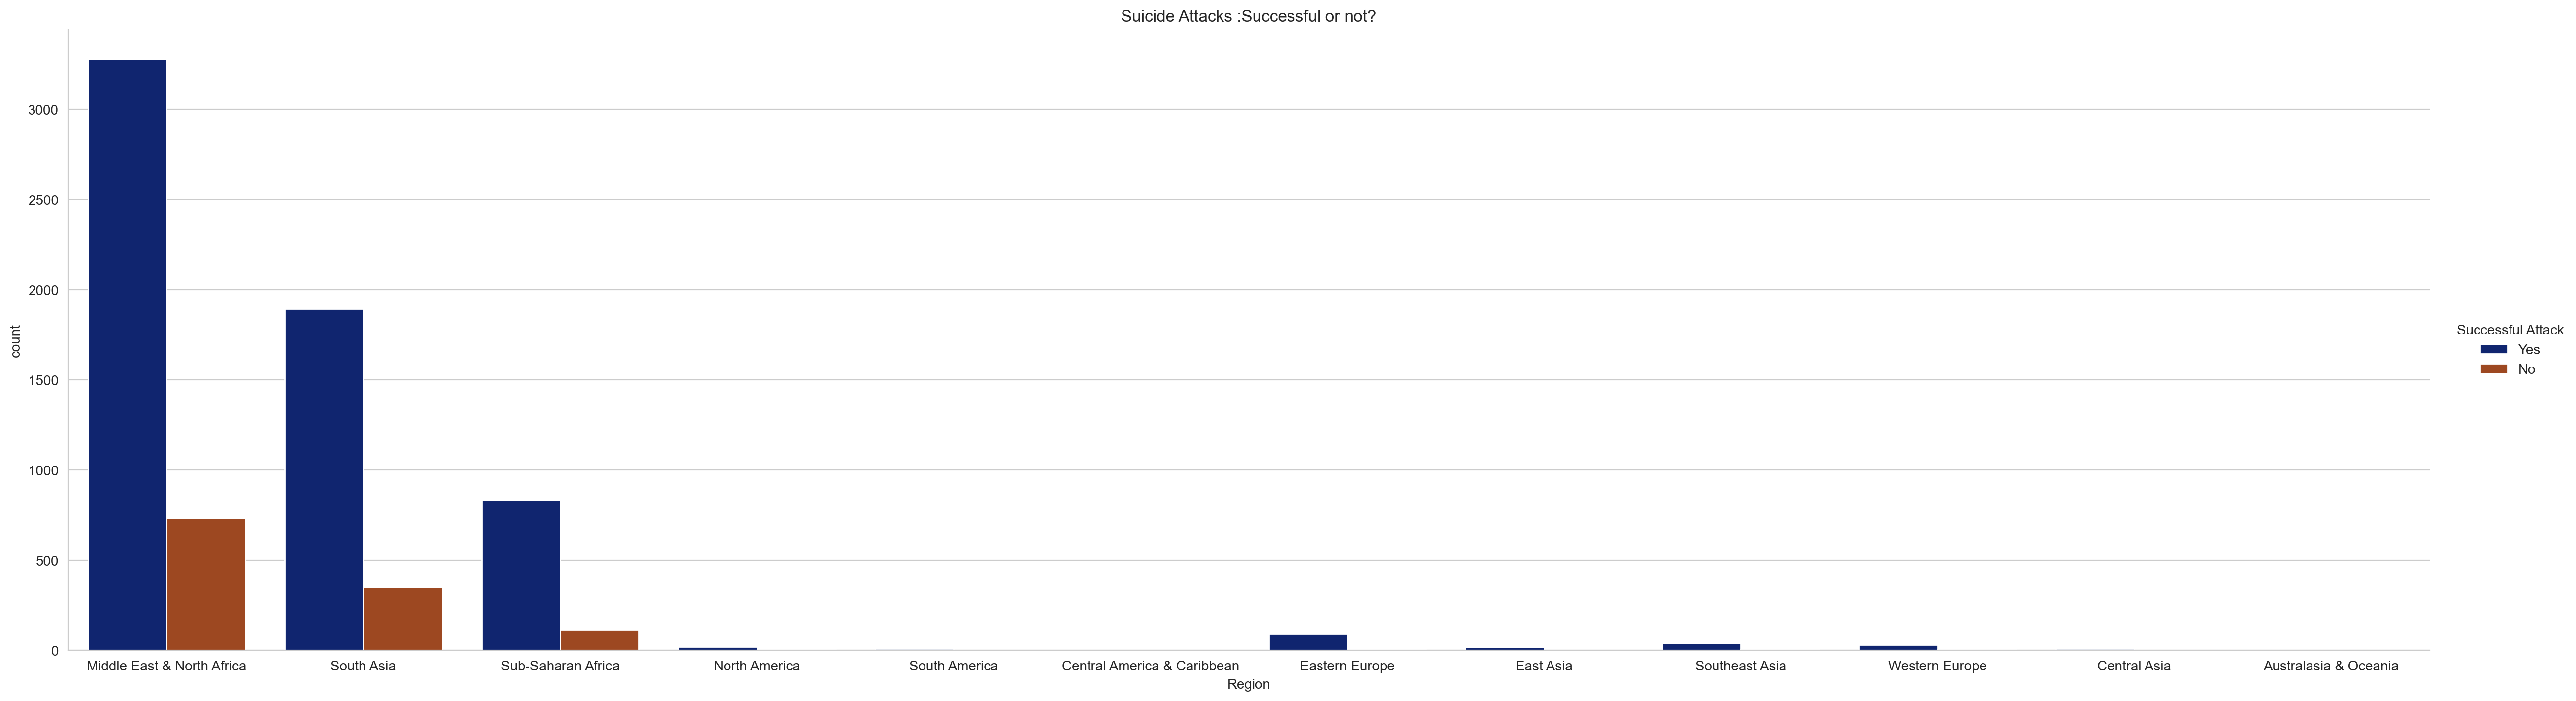

In [38]:
# Plotting successful and unsuccessful suicide Attacks count region wise

filtered = df[df['Suicide Attack'] == 'Yes'] # Attacks where suicide attacks have occured

sns.catplot(x='Region', data=filtered, hue='Successful Attack',palette = 'dark',aspect=25/7,height = 7,kind='count')\
.set(title='Suicide Attacks :Successful or not?')

- `Middle East & North Africa`, `South Asia` and `Sub-Saharan Africa` have the highest suicide attacks.
- Note that, the <u>proportion of successful suicide attacks is higher than that of unsuccessful attacks</u>.

<AxesSubplot: xlabel='Data Collection Agency'>

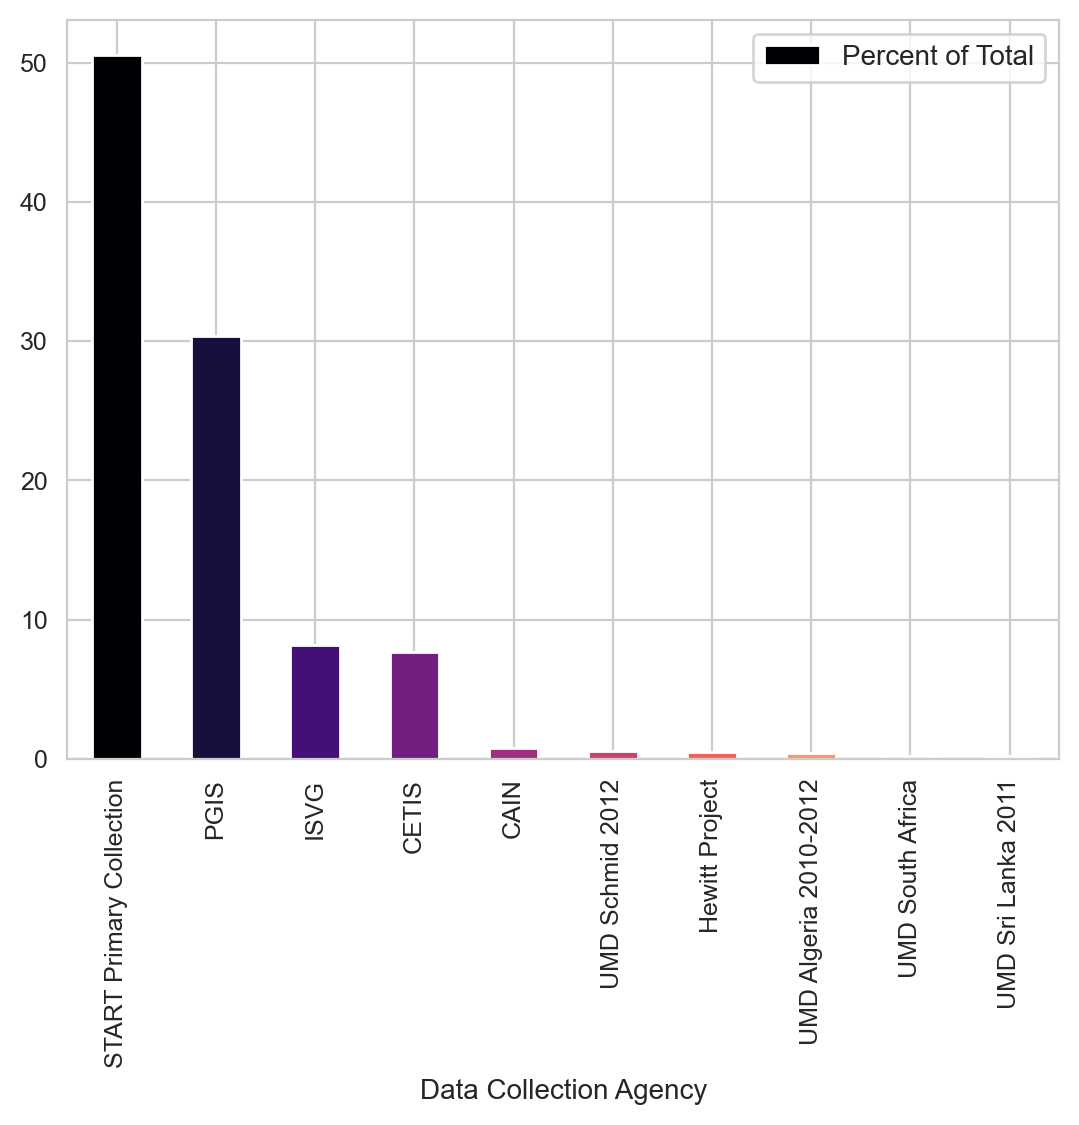

In [40]:
output = pd.DataFrame((df['Data Collection'].value_counts(normalize=True)*100)[:10]).reset_index() \
.rename(columns={'index':'Data Collection Agency', 'Data Collection': 'Percent of Total'})

colors = plt.cm.magma(np.linspace(0, 1, len(output)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

output.plot.bar(x='Data Collection Agency', y='Percent of Total', fontsize='9', color=colors)


- Majority of Data has been colelction by `START Primary Collection` (50%) followed by `PGIS` (30%), `ISVG` (8.2%) and `CETIS` (7.7%)

# 🌟 Unveiling the Shadows: The Turbulence of Terrorist Incidents in India 🌟


In [41]:
df_india = df[df['Country'] == 'India']    # Looking at rows with country as India

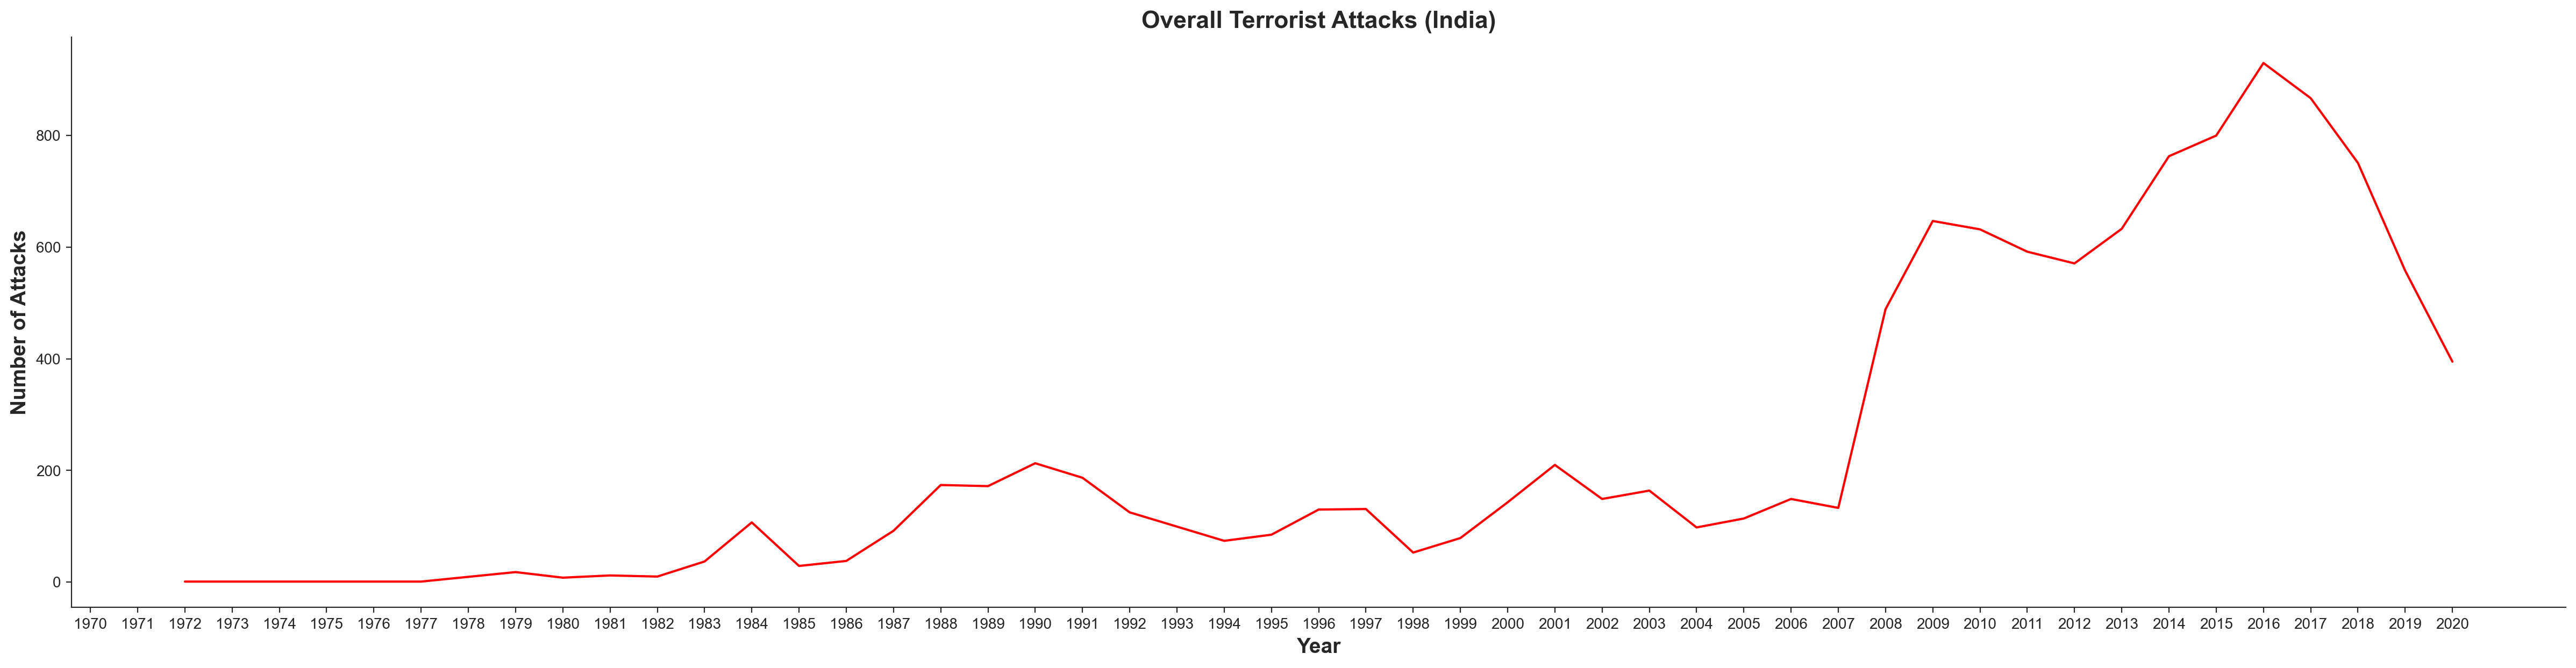

In [45]:
''' Taking only attacks which are terrorism attacks for sure'''
# Setting the size and DPI
%config InlineBackend.figure_format = 'retina'  # For high-resolution displays
sns.set_style('ticks')
year_attack_count = df_india[df_india['Doubt if Terrorism?'] == 'No'].groupby('Year')['Year'].count()
sns.relplot(x='Year', y=year_attack_count.values, kind='line', data=year_attack_count, height = 6, aspect=4, color='red')

# Customize x-axis ticks and labels
new_ticks = list(np.arange(1970,2021,1))
plt.xticks(new_ticks)
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Number of Attacks', fontweight='bold', fontsize=14)
plt.title('Overall Terrorist Attacks (India)',fontsize=16, fontweight='bold')
plt.show()

- Attacks in `India` have peaked around `2016` which is a little different from the world

<AxesSubplot: xlabel='Attack Type'>

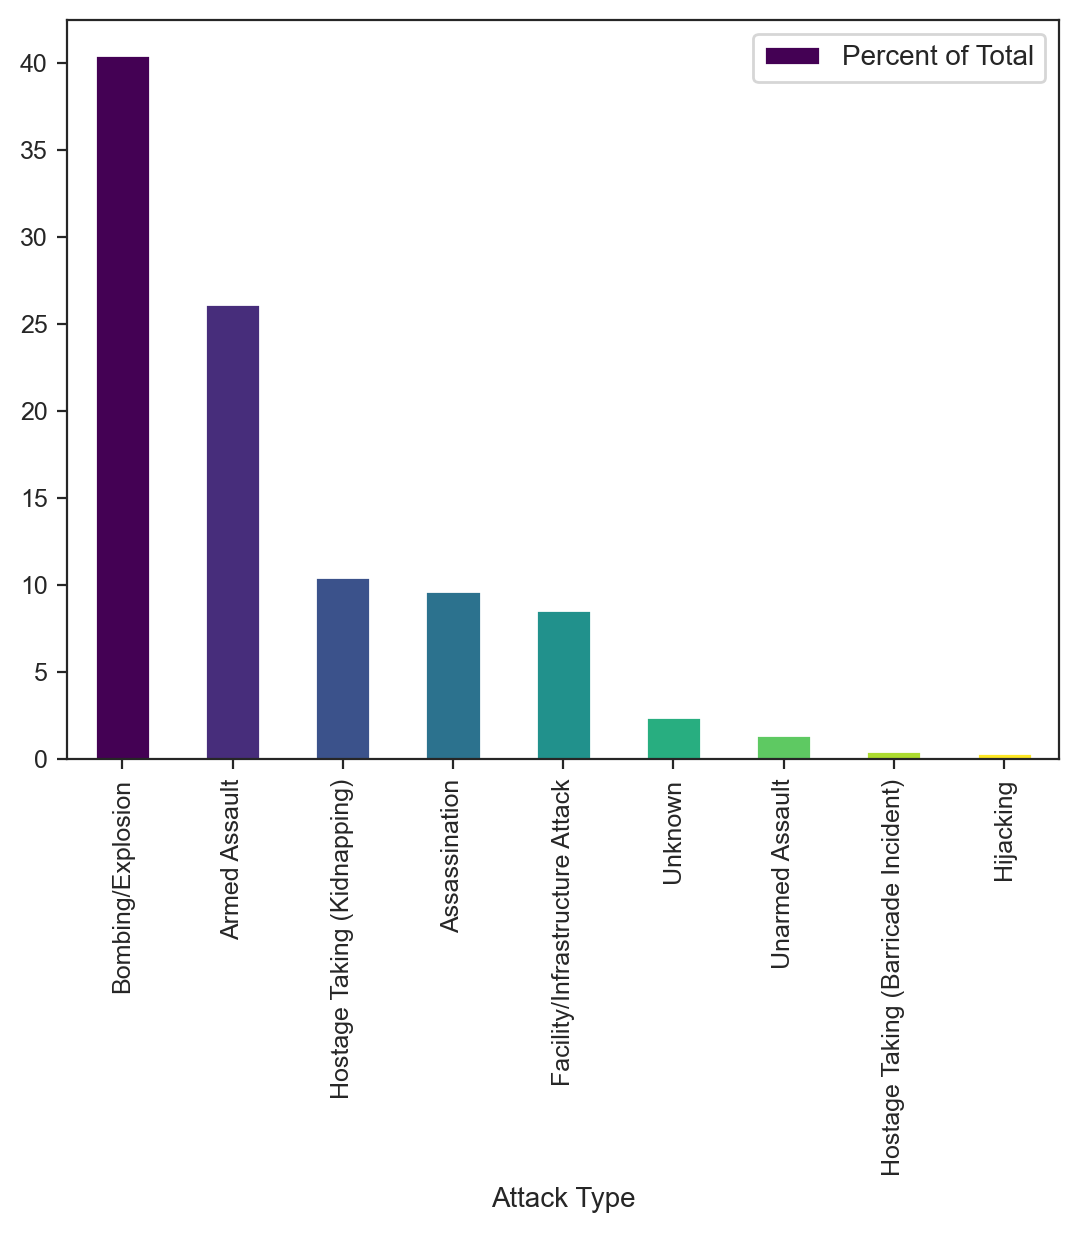

In [52]:
output = pd.DataFrame((df_india['Attack Type'].value_counts(normalize=True)*100)).reset_index() \
.rename(columns={'index':'Attack Type', 'Attack Type': 'Percent of Total'})

colors = plt.cm.viridis(np.linspace(0, 1, len(output)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

output.plot.bar(x='Attack Type', y='Percent of Total', fontsize='9', color=colors)

- Roughly 40% of attack are `Bombing/Explosion` followed by `Armed Assualt` (26%), `Hostage Taking (Kidnapping)` (10%) and `Assassination` (9%) 

<AxesSubplot: xlabel='City'>

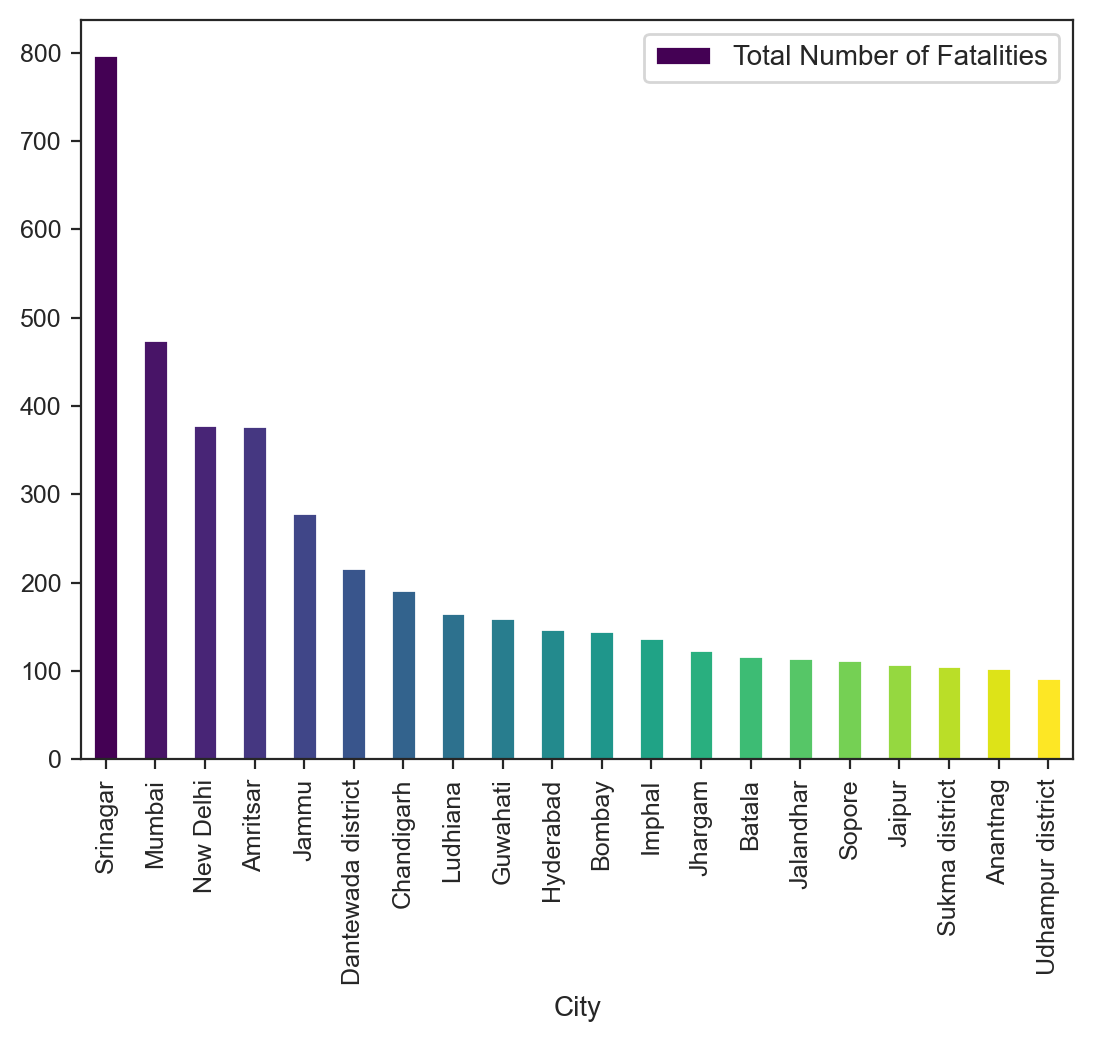

In [68]:
grouped = pd.DataFrame(df_india[(df_india['Total Number of Fatalities'] != -99) & (df_india['City'] != 'Unknown')]
                       .groupby('City')['Total Number of Fatalities'].sum().reset_index()).sort_values(by='Total Number of Fatalities', ascending=False)[:20]
    
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

grouped.plot.bar(x='City', y='Total Number of Fatalities', fontsize='9', color=colors) 

- Total Number of Fatalities have been highest in `Srinagar` followed by `Mumbai`, `New Delhi` and `Amritsar`


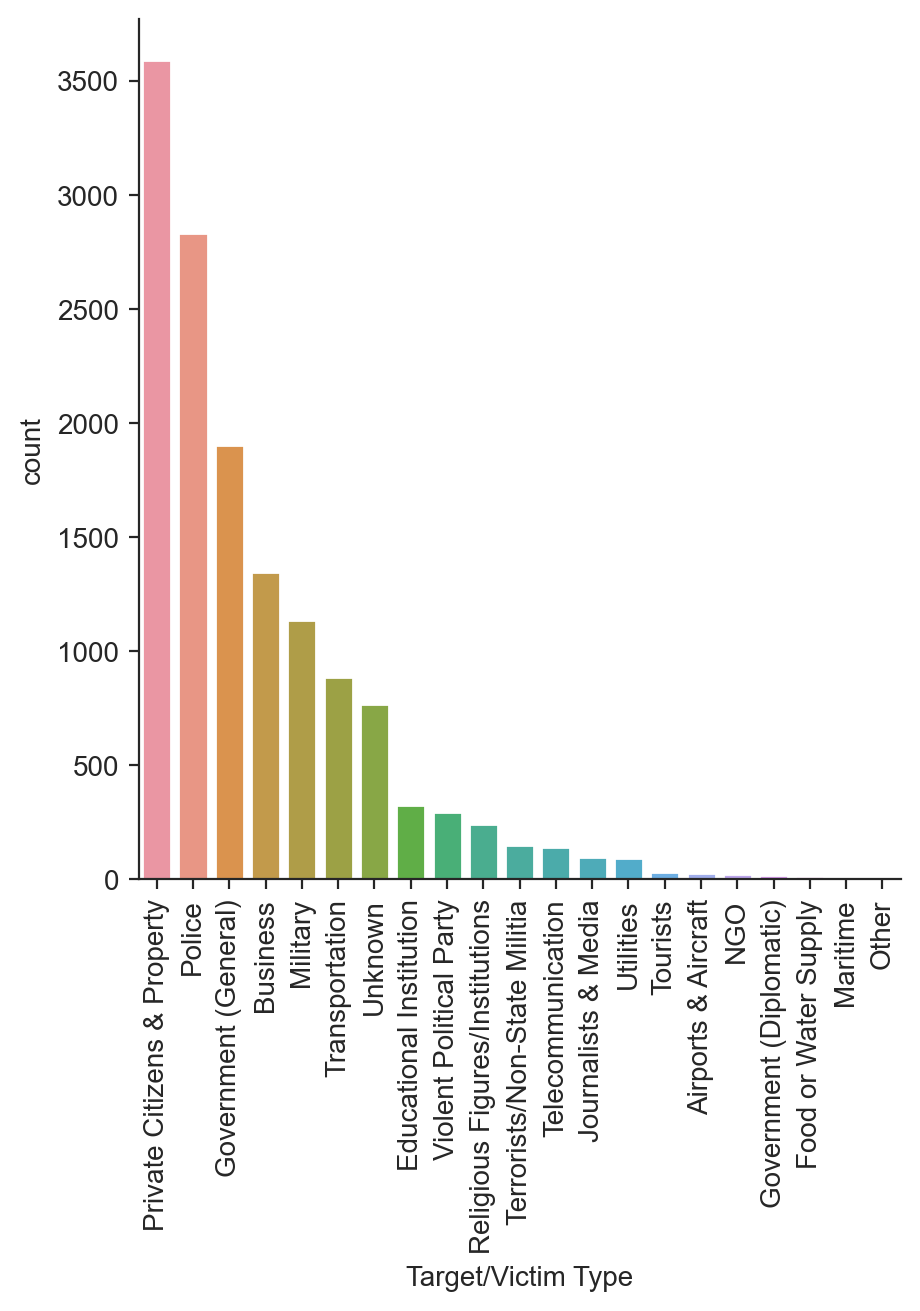

In [74]:
order = list(df_india['Target/Victim Type'].value_counts().index)
sns.catplot(x='Target/Victim Type', data=df_india, kind='count', order = order)
plt.xticks(rotation=90)
plt.show()

- `Private Citizen & Property` are most targeted followed by `Police` and `Government (General)`

<AxesSubplot: xlabel='Perpetrator Group Name'>

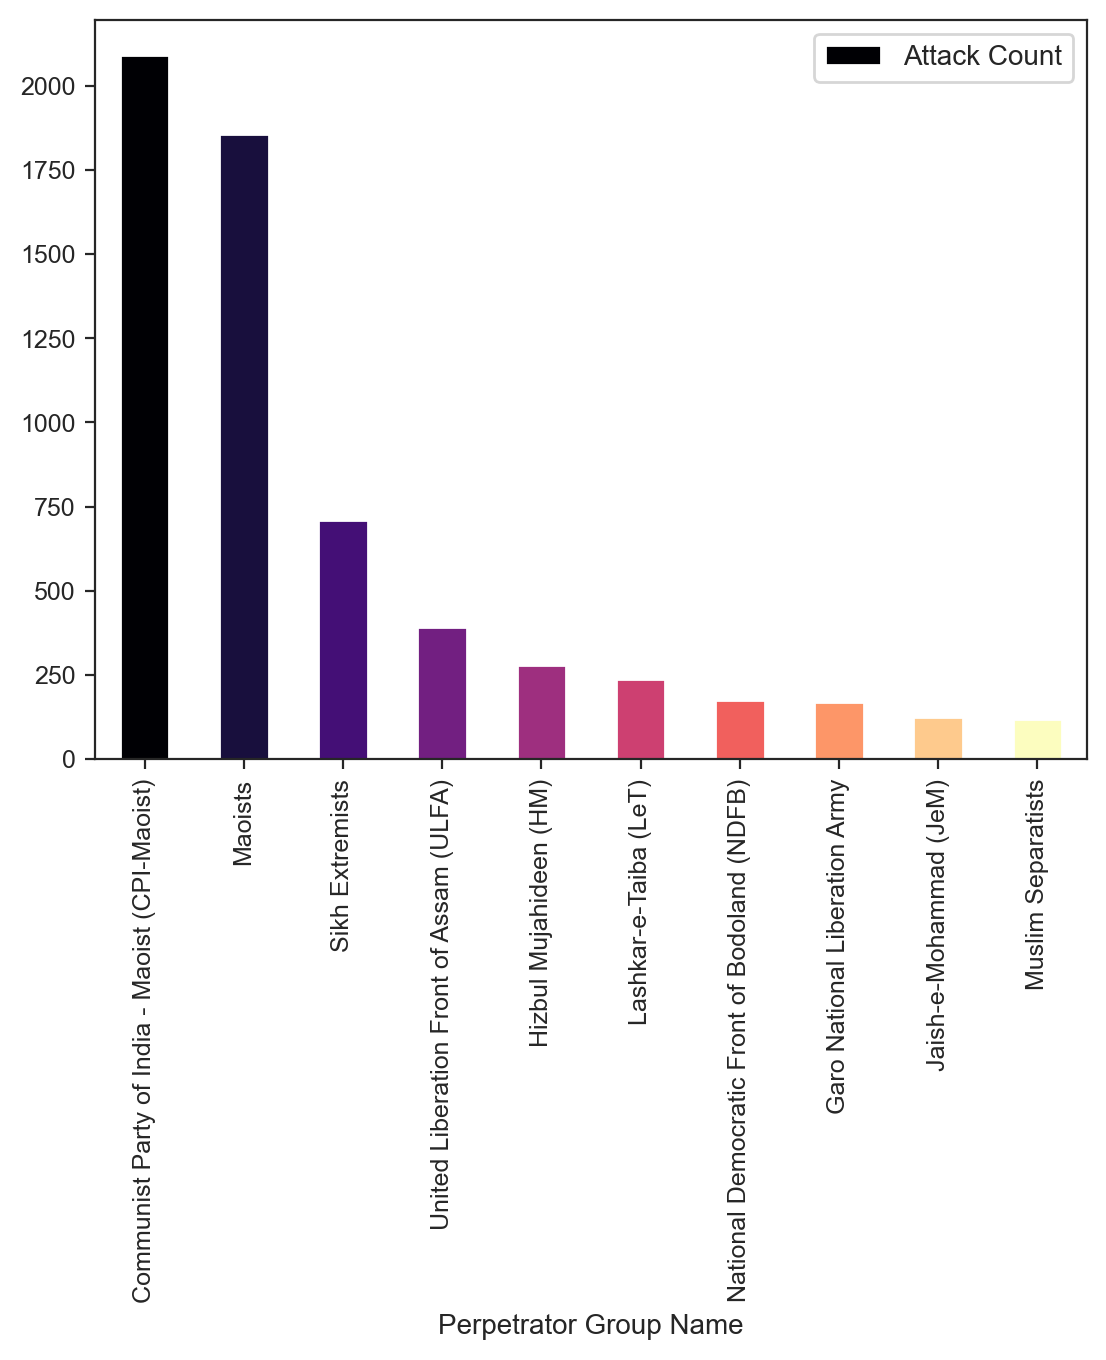

In [82]:
filtered = df_india[df_india['Perpetrator Group Name'] != 'Unknown']

grouped = pd.DataFrame(filtered['Perpetrator Group Name'].value_counts().reset_index()) \
                .rename(columns={'index':'Perpetrator Group Name', 'Perpetrator Group Name': 'Attack Count'})[:10]  # Selecting top 10

colors = plt.cm.magma(np.linspace(0, 1, len(grouped)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

grouped.plot.bar(x='Perpetrator Group Name', y='Attack Count', fontsize='9', color=colors) 

- `CPI-Maoist` are the most active terrorist group followed by `Maoist` and `Sikh Extremists`

<AxesSubplot: xlabel='Weapon Type'>

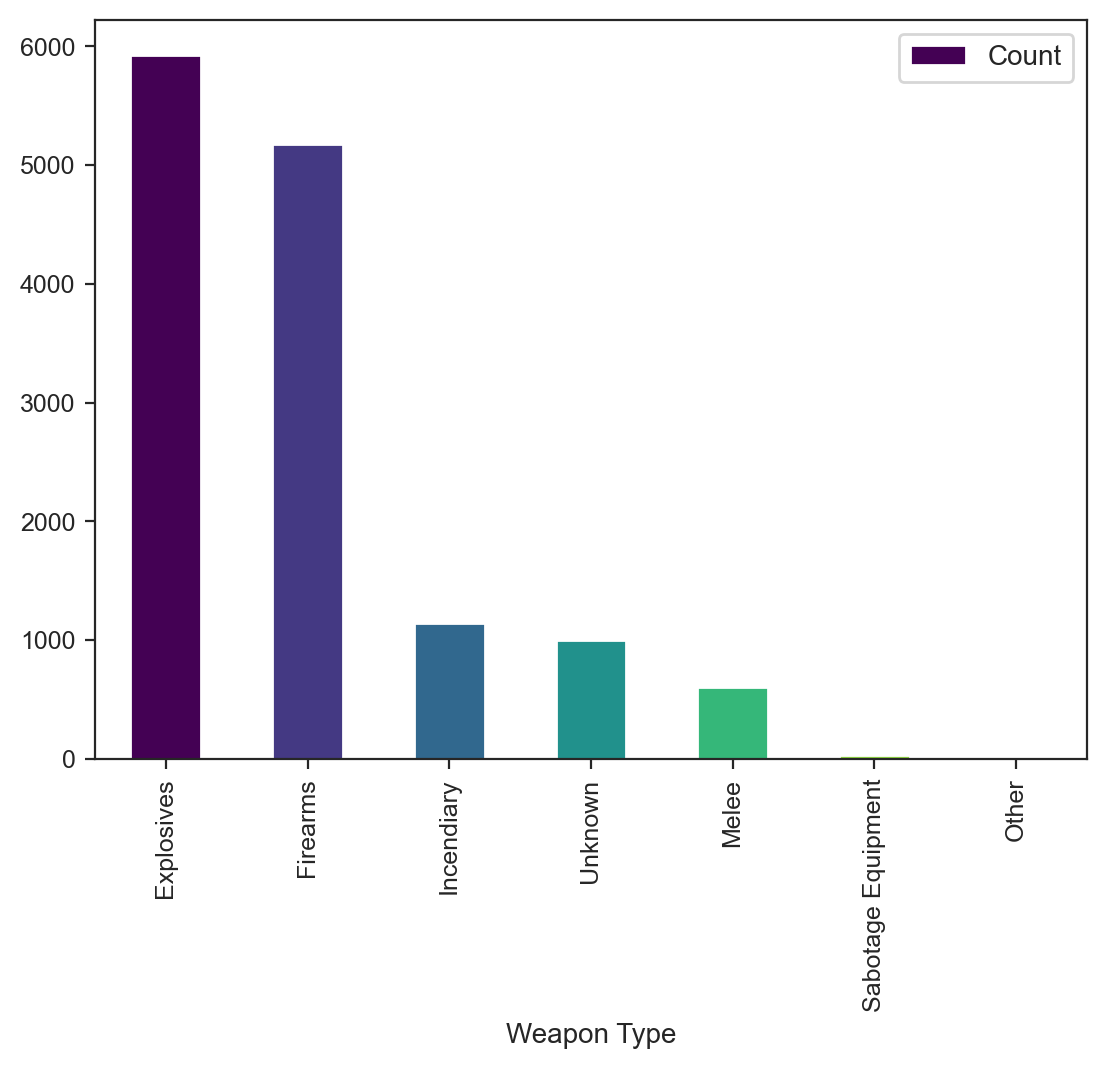

In [87]:
grouped = pd.DataFrame(df_india['Weapon Type'].value_counts().reset_index()) \
                .rename(columns={'index':'Weapon Type', 'Weapon Type': 'Count'})[:7]

colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

grouped.plot.bar(x='Weapon Type', y='Count', fontsize='9', color=colors) 

- `Explosives` and `Firearms` are most common weapon type used in terrorist attacks of India.

# SUMMARY
### Univariate Analysis (Numerical)

- High correlation among numeric columns, but caution needed due to imputed missing values.
- Gradual increase in terrorist attacks until 2014, followed by a decline.
- Number of perpetrators captured peaked in 2012.
- Missing data in `Number of Perpetrators Captured` particularly until 1998.

### Univariate Analysis (Categorical)

- Most attacks are not extended incidents (lasting less than 24 hours).
- Iraq is the most targeted country (13%), followed by Afghanistan (9%), Pakistan (7.4%), and India (6.6%).
- Middle East & North Africa (28%) and South Asia (26%) are high-attack regions.
- No clear patterns in 'Province / Administrative Region / State' and 'City' columns.
- 77% undoubtedly classified as terrorist attacks, 17% doubted, and 6% lack data.
- 85% of attacks are not part of multiple incidents.
- Most attacks (88%) are successful.
- Common attack types include 'Bombing/Explosion' (47%), 'Armed Assault' (24%), and 'Assassination' (10%).
- 'Private Citizens & Property' (24.8%) are the most targeted, followed by 'Military' (16.3%), 'Police' (13.6%), 'Government' (11.4%), and 'Business' (10.6%).
- Active perpetrator groups like 'Taliban' (10.2%) and 'ISIL' (6.2%).

### Bivariate and Multivariate Analysis

- Increasing terrorism over the years, with the Middle East & North Africa and South Asia having the most attacks.
- Duration of attacks extending over 24 hours in South Asia, Sub-Saharan Africa, and Middle East & North Africa.
- Afghanistan, India, Nigeria, and Iraq had the most prolonged attacks.
- 'Hostage Taking' involved in the majority of attacks (around 85%).
- Common perpetrator groups, including 'Taliban' and 'ISIL.'
- Most common weapon types: 'Firearms' and 'Explosives.'
- High fatalities in the Middle East & North Africa, South Asia, and Sub-Saharan Africa.
- Different regions have different attack type patterns.
- 'Private Citizens & Property' most common target in various regions.
- Specific nationalities targeted in different regions.
- Active perpetrator groups vary by region.
- Common weapon types are 'Firearms' and 'Explosives.'
- High successful suicide attacks in specific regions.
- Majority of data collected by 'START Primary Collection' (50%).

####  🌟 Unveiling the Shadows: The Turbulence of Terrorist Incidents in India 🌟

- Peak in attacks around 2016.
- Dominance of 'Bombing/Explosion' (40%) and 'Armed Assault' (26%).
- High fatalities in cities like 'Srinagar,' 'Mumbai,' 'New Delhi,' and 'Amritsar.'
- 'CPI-Maoist' is the most active group.
- 'Explosives' and 'Firearms' are commonly used in India.
